In [136]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [21]:
# given dataset

In [22]:
names = pd.read_csv('babynames.csv.gz')
names = names.rename(columns = {'n':'count', 'prop':'prob'})
names.head()

,year,sex,name,count,prob
0,1880,F,Mary,7065,0.072384
1,1880,F,Anna,2604,0.026679
2,1880,F,Emma,2003,0.020521
3,1880,F,Elizabeth,1939,0.019866
4,1880,F,Minnie,1746,0.017888


In [23]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924665 entries, 0 to 1924664
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   year    int64  
 1   sex     object 
 2   name    object 
 3   count   int64  
 4   prob    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 73.4+ MB


In [24]:
names['decade'] = (names['year'] // 10) * 10
names.head()

,year,sex,name,count,prob,decade
0,1880,F,Mary,7065,0.072384,1880
1,1880,F,Anna,2604,0.026679,1880
2,1880,F,Emma,2003,0.020521,1880
3,1880,F,Elizabeth,1939,0.019866,1880
4,1880,F,Minnie,1746,0.017888,1880


# Exploratory Data Analysis

## 1. Most popular names in each decade for each sex

In [25]:

top_names_per_decade_sex = names.groupby(['decade', 'sex']).apply(lambda x: x.nlargest(1, 'count'))
top_names_per_decade_sex = top_names_per_decade_sex.drop(columns = ['sex', 'decade'])

In [26]:
top_names_per_decade_sex = top_names_per_decade_sex.reset_index()
top_names_per_decade_sex = top_names_per_decade_sex.drop(columns = 'level_2')

In [27]:
top_names_per_decade_sex = top_names_per_decade_sex.sort_values(by = ['sex', 'decade'])
top_names_per_decade_sex

,decade,sex,year,name,count,prob
0,1880,F,1888,Mary,11754,0.062044
2,1890,F,1898,Mary,14406,0.052549
4,1900,F,1909,Mary,19259,0.052321
6,1910,F,1918,Mary,67366,0.056028
8,1920,F,1921,Mary,73982,0.057811
10,1930,F,1930,Mary,64146,0.054994
12,1940,F,1947,Linda,99686,0.054838
14,1950,F,1950,Linda,80432,0.045736
16,1960,F,1965,Lisa,60266,0.032979
18,1970,F,1972,Jennifer,63604,0.039445


In [28]:
ex_name = 'William'
name_trend = names[names['name'] == ex_name].groupby(['decade', 'sex'])['count'].sum().unstack(fill_value=0)
name_trend

sex,F,M
decade,,
1880,365,84881
1890,374,72244
1900,326,69320
1910,1133,303022
1920,2656,512400
1930,1904,416646
1940,1505,556399
1950,1398,591025
1960,1793,421539


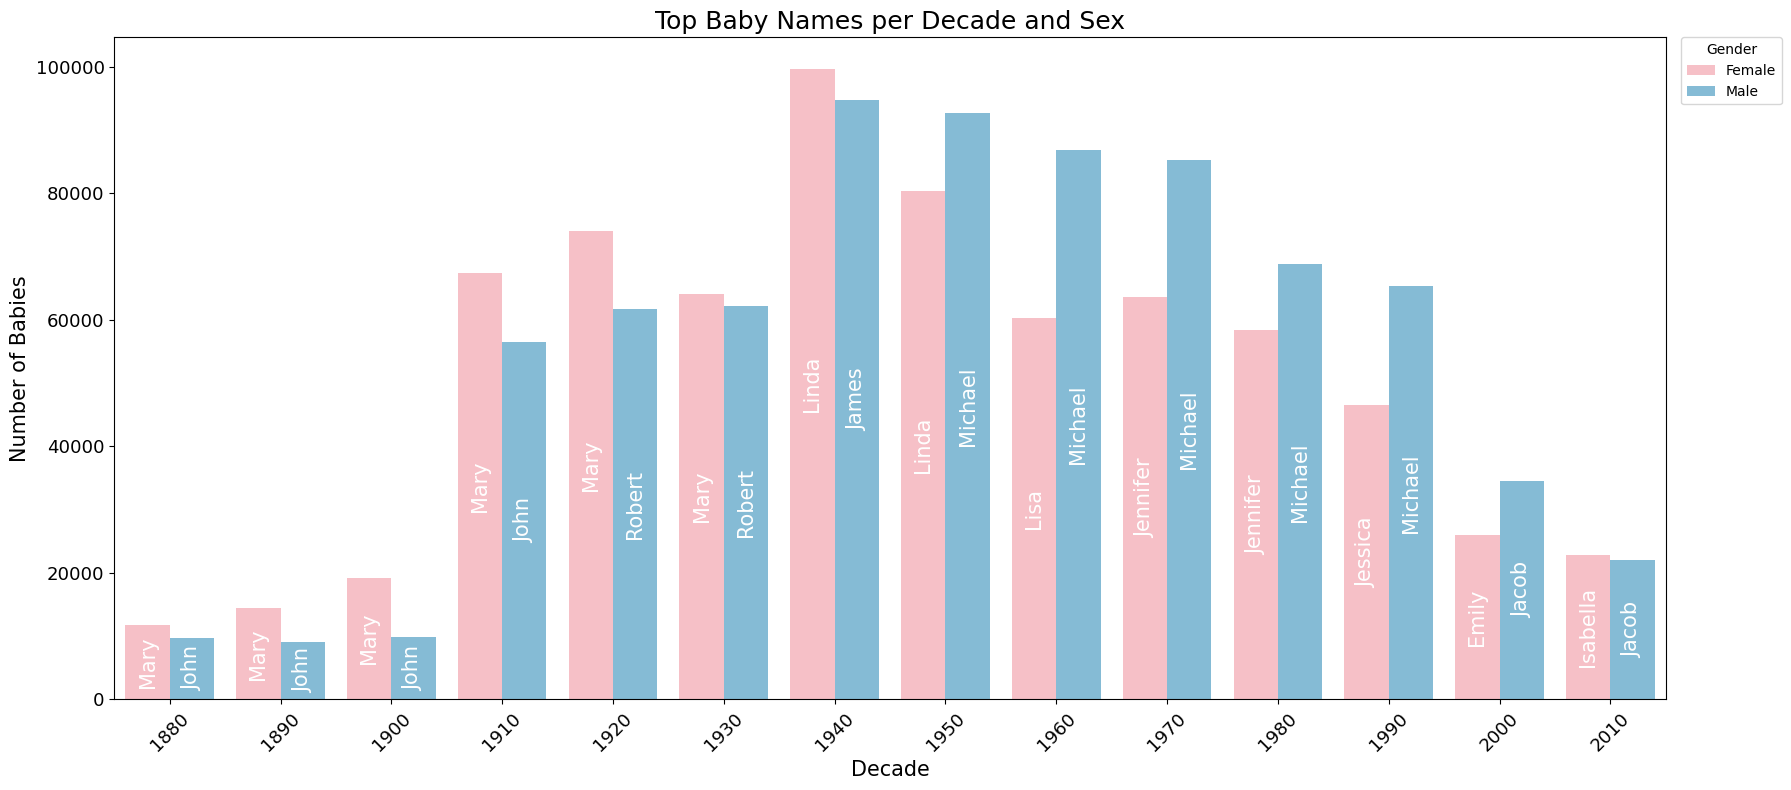

In [208]:
top_names_per_decade_sex.reset_index(drop=True, inplace=True)


custom_palette = {'F': '#ffb7c1', 'M': '#78bfe2'}

f, ax = plt.subplots(figsize=(18, 8))
barplot = sns.barplot(
    x='decade', 
    y='count', 
    hue='sex', 
    data=top_names_per_decade_sex, 
    palette=custom_palette, 
    ax=ax
)


ax.set_title('Top Baby Names per Decade and Sex', fontsize = 18)
ax.set_xlabel('Decade', fontsize = 15)
ax.set_ylabel('Number of Babies', fontsize = 15)
plt.xticks(rotation=45, fontsize = 13)
plt.yticks(fontsize = 13)


# Adding text annotations
for index, bar in enumerate(barplot.patches):
    name = top_names_per_decade_sex.loc[index]['name']
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() / 2, 
        name, 
        ha='center', 
        va='center', 
        rotation='vertical', 
        color='white', 
        size=15
    )

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Female', 'Male'], title='Gender', bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.tight_layout() 
plt.show()

## 2. Getting Eternal Names

In [30]:
# Sorting by name & sex
names_sorted = names.sort_values(by=['year', 'sex', 'count'], ascending=[True, True, False])

# Finding the top 30 names for each gender for each year
top_names_by_year_sex = names_sorted.groupby(['year', 'sex']).head(30)
eternal_names = top_names_by_year_sex.groupby(['name', 'sex']).size()
num_years = names_sorted['year'].nunique()
eternal_names = eternal_names[eternal_names == num_years].reset_index(name='year_count')

# Separating the eternal names by sex
eternal_male_names = eternal_names[(eternal_names['sex'] == 'M') & 
                                   (eternal_names['year_count'] == num_years)]['name'].tolist()
eternal_female_names = eternal_names[(eternal_names['sex'] == 'F') & 
                                     (eternal_names['year_count'] == num_years)]['name'].tolist()

print("Eternal Male Names: ", eternal_male_names)
print("Eternal Male Names: ", eternal_female_names)

Eternal Male Names:  ['James', 'John', 'Joseph', 'William']
Eternal Male Names:  ['Elizabeth']


## 3. Popular President Names

In [31]:
president = pd.read_csv('presidents.csv')

president[['Term Start Year', 'Term End Year']] = president['Years In Office'].str.split('-',
                                                                                         expand=True)

president.head()

,President Name,Years In Office,Number,Party,Term Start Year,Term End Year
0,George Washington,1789-1797,1st,Federalist,1789,1797
1,John Adams,1797-1801,2nd,Federalist,1797,1801
2,Thomas Jefferson,1801-1809,3rd,Democratic Republican,1801,1809
3,James Madison,1809-1817,4th,Democratic Republican,1809,1817
4,James Monroe,1817-1825,5th,Democratic Republican,1817,1825


In [32]:
president['Term End Year'].fillna(president['Term Start Year'], inplace=True)

In [33]:
biden_index = president[president['President Name'] == 'Joe Biden'].index

# Update the Term End Year for Joe Biden to 2024
president.loc[biden_index, 'Term End Year'] = 2024

In [34]:
president = president.drop(columns = ['Years In Office', 'Number', 'Party'])
president['First Name'] = president['President Name'].str.split(' ', n=1).str[0]
president.head()

,President Name,Term Start Year,Term End Year,First Name
0,George Washington,1789,1797,George
1,John Adams,1797,1801,John
2,Thomas Jefferson,1801,1809,Thomas
3,James Madison,1809,1817,James
4,James Monroe,1817,1825,James


In [35]:
president_baby = pd.merge(president, names, left_on = 'First Name', right_on = 'name', how = 'inner' )
president_baby

,President Name,Term Start Year,Term End Year,First Name,year,sex,name,count,prob,decade
0,George Washington,1789,1797,George,1880,F,George,26,0.000266,1880
1,George Washington,1789,1797,George,1880,M,George,5126,0.043294,1880
2,George Washington,1789,1797,George,1881,F,George,30,0.000303,1880
3,George Washington,1789,1797,George,1881,M,George,4664,0.043073,1880
4,George Washington,1789,1797,George,1882,F,George,32,0.000277,1880
...,...,...,...,...,...,...,...,...,...,...
10286,Joe Biden,2021,2024,Joe,2013,M,Joe,474,0.000235,2010
10287,Joe Biden,2021,2024,Joe,2014,M,Joe,488,0.000239,2010
10288,Joe Biden,2021,2024,Joe,2015,M,Joe,457,0.000224,2010
10289,Joe Biden,2021,2024,Joe,2016,M,Joe,431,0.000214,2010


In [36]:
president1 = pd.read_csv('presidents.csv')
president1[['Term Start Year', 'Term End Year']] = president1['Years In Office'].str.split('-',
                                                                                         expand=True)
president1['Term End Year'].fillna(president1['Term Start Year'], inplace=True)
biden_index = president1[president1['President Name'] == 'Joe Biden'].index

# Update the Term End Year for Joe Biden to 2024
president1.loc[biden_index, 'Term End Year'] = 2024
president1

,President Name,Years In Office,Number,Party,Term Start Year,Term End Year
0,George Washington,1789-1797,1st,Federalist,1789,1797
1,John Adams,1797-1801,2nd,Federalist,1797,1801
2,Thomas Jefferson,1801-1809,3rd,Democratic Republican,1801,1809
3,James Madison,1809-1817,4th,Democratic Republican,1809,1817
4,James Monroe,1817-1825,5th,Democratic Republican,1817,1825
5,John Quincy Adams,1825-1829,6th,Democratic Republican,1825,1829
6,Andrew Jackson,1829-1837,7th,Democratic,1829,1837
7,Martin Van Buren,1837-1841,8th,Democratic,1837,1841
8,William H. Harrison,1841,9th,Whig,1841,1841
9,John Tyler,1841-1845,10th,Whig,1841,1845


In [37]:
terms = []

# Iterate through the DataFrame rows
for index, row in president1.iterrows():
    # Split the President Name into first name and last name
    first_name, _ = row['President Name'].split(' ', 1)

    # Extract years from Years In Office
    years = row['Years In Office'].split('-')

    # Handle single years or year ranges with missing end years
    if len(years) == 1:
        start_year = end_year = int(years[0])
    elif len(years) == 2:
        start_year = int(years[0])
        if years[1]:  # Check if end year exists
            end_year = int(years[1])
        else:
            end_year = None

    # Create a dictionary for the current president and append it to the terms list
    president_dict = {'first_name': first_name, 'start': start_year, 'end': end_year}
    terms.append(president_dict)

# The 'terms' list now contains the desired dictionary
print(terms)

[{'first_name': 'George', 'start': 1789, 'end': 1797}, {'first_name': 'John', 'start': 1797, 'end': 1801}, {'first_name': 'Thomas', 'start': 1801, 'end': 1809}, {'first_name': 'James', 'start': 1809, 'end': 1817}, {'first_name': 'James', 'start': 1817, 'end': 1825}, {'first_name': 'John', 'start': 1825, 'end': 1829}, {'first_name': 'Andrew', 'start': 1829, 'end': 1837}, {'first_name': 'Martin', 'start': 1837, 'end': 1841}, {'first_name': 'William', 'start': 1841, 'end': 1841}, {'first_name': 'John', 'start': 1841, 'end': 1845}, {'first_name': 'James', 'start': 1845, 'end': 1849}, {'first_name': 'Zachary', 'start': 1849, 'end': 1850}, {'first_name': 'Millard', 'start': 1850, 'end': 1853}, {'first_name': 'Franklin', 'start': 1853, 'end': 1857}, {'first_name': 'James', 'start': 1857, 'end': 1861}, {'first_name': 'Abraham', 'start': 1861, 'end': 1865}, {'first_name': 'Andrew', 'start': 1865, 'end': 1869}, {'first_name': 'Ulysses', 'start': 1869, 'end': 1877}, {'first_name': 'Rutherford', '

In [38]:
president_baby

,President Name,Term Start Year,Term End Year,First Name,year,sex,name,count,prob,decade
0,George Washington,1789,1797,George,1880,F,George,26,0.000266,1880
1,George Washington,1789,1797,George,1880,M,George,5126,0.043294,1880
2,George Washington,1789,1797,George,1881,F,George,30,0.000303,1880
3,George Washington,1789,1797,George,1881,M,George,4664,0.043073,1880
4,George Washington,1789,1797,George,1882,F,George,32,0.000277,1880
...,...,...,...,...,...,...,...,...,...,...
10286,Joe Biden,2021,2024,Joe,2013,M,Joe,474,0.000235,2010
10287,Joe Biden,2021,2024,Joe,2014,M,Joe,488,0.000239,2010
10288,Joe Biden,2021,2024,Joe,2015,M,Joe,457,0.000224,2010
10289,Joe Biden,2021,2024,Joe,2016,M,Joe,431,0.000214,2010


In [39]:
president_baby['Term End Year'] = president_baby['Term End Year'].astype(int)

In [40]:
president_baby[(president_baby['Term End Year'] >= 1880)]

,President Name,Term Start Year,Term End Year,First Name,year,sex,name,count,prob,decade
271,George H.W. Bush,1989,1993,George,1880,F,George,26,0.000266,1880
272,George H.W. Bush,1989,1993,George,1880,M,George,5126,0.043294,1880
273,George H.W. Bush,1989,1993,George,1881,F,George,30,0.000303,1880
274,George H.W. Bush,1989,1993,George,1881,M,George,4664,0.043073,1880
275,George H.W. Bush,1989,1993,George,1882,F,George,32,0.000277,1880
...,...,...,...,...,...,...,...,...,...,...
10286,Joe Biden,2021,2024,Joe,2013,M,Joe,474,0.000235,2010
10287,Joe Biden,2021,2024,Joe,2014,M,Joe,488,0.000239,2010
10288,Joe Biden,2021,2024,Joe,2015,M,Joe,457,0.000224,2010
10289,Joe Biden,2021,2024,Joe,2016,M,Joe,431,0.000214,2010


In [41]:
president_baby = president_baby[(president_baby['sex'] == 'M') & (president_baby['Term End Year'] >= 1880)]

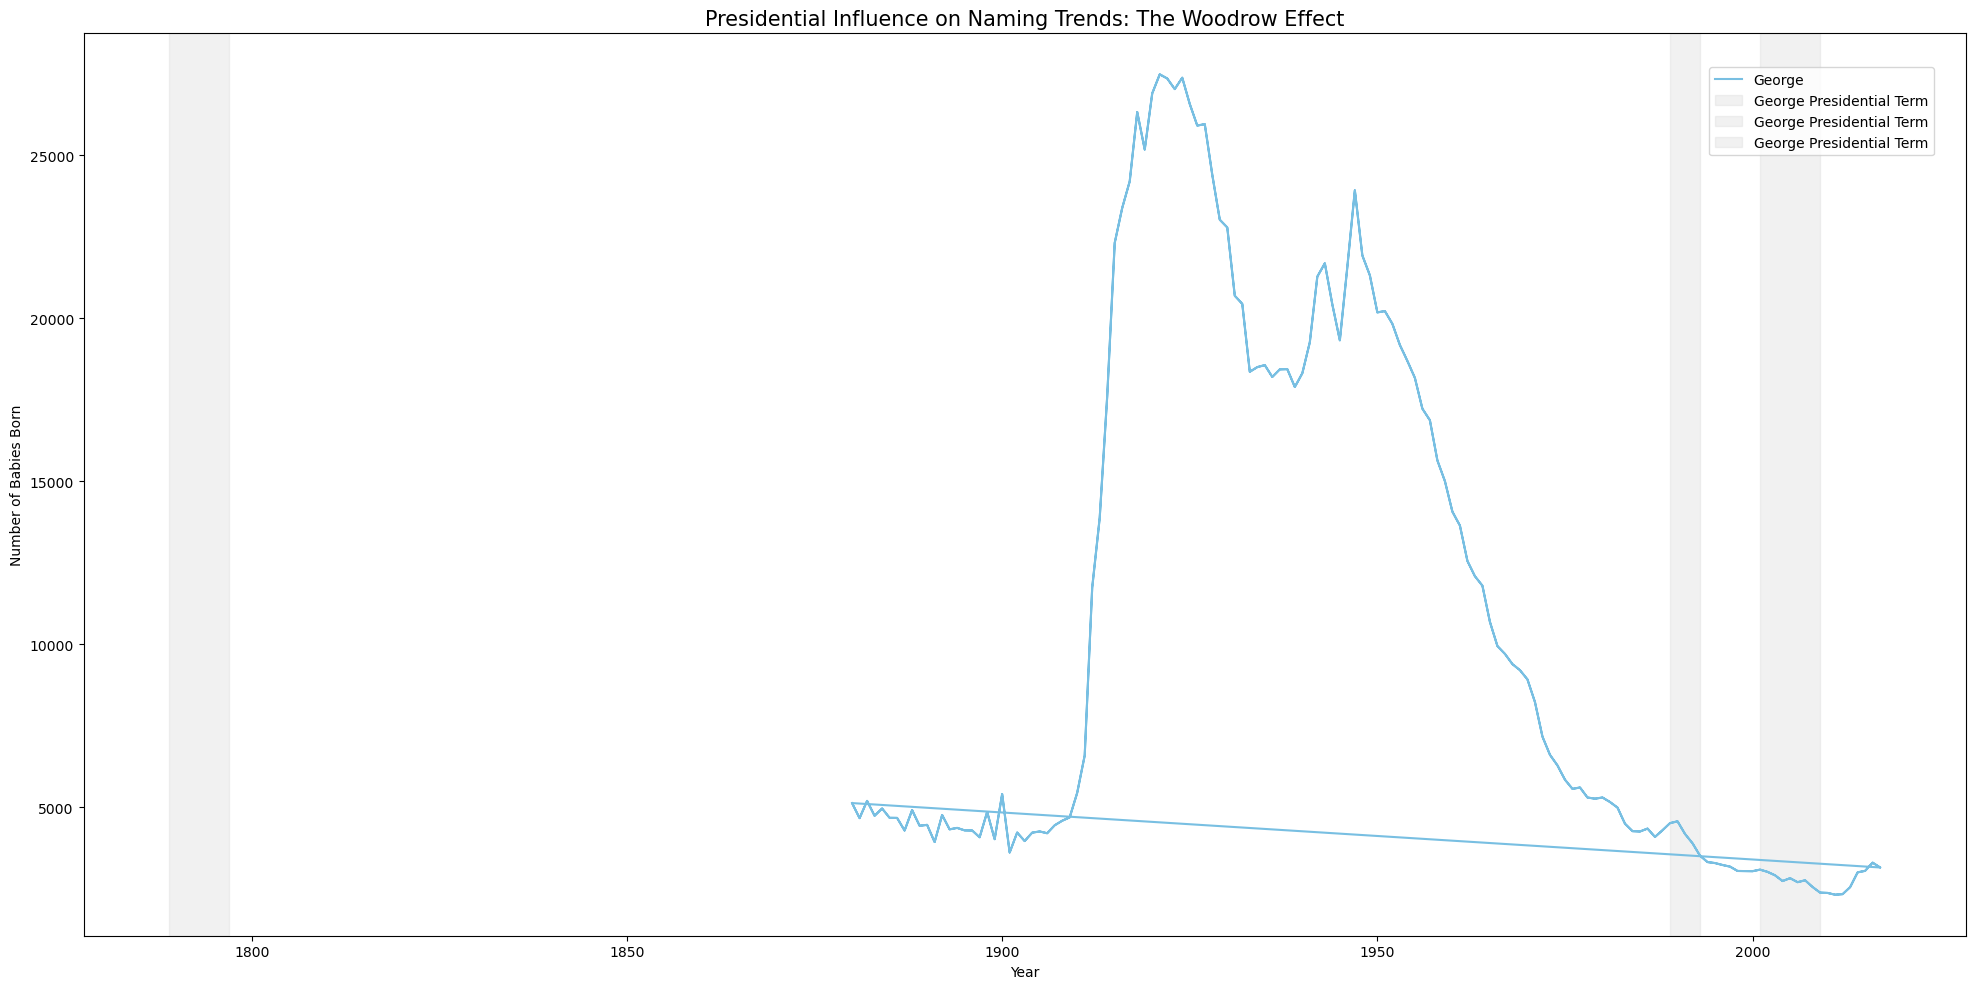

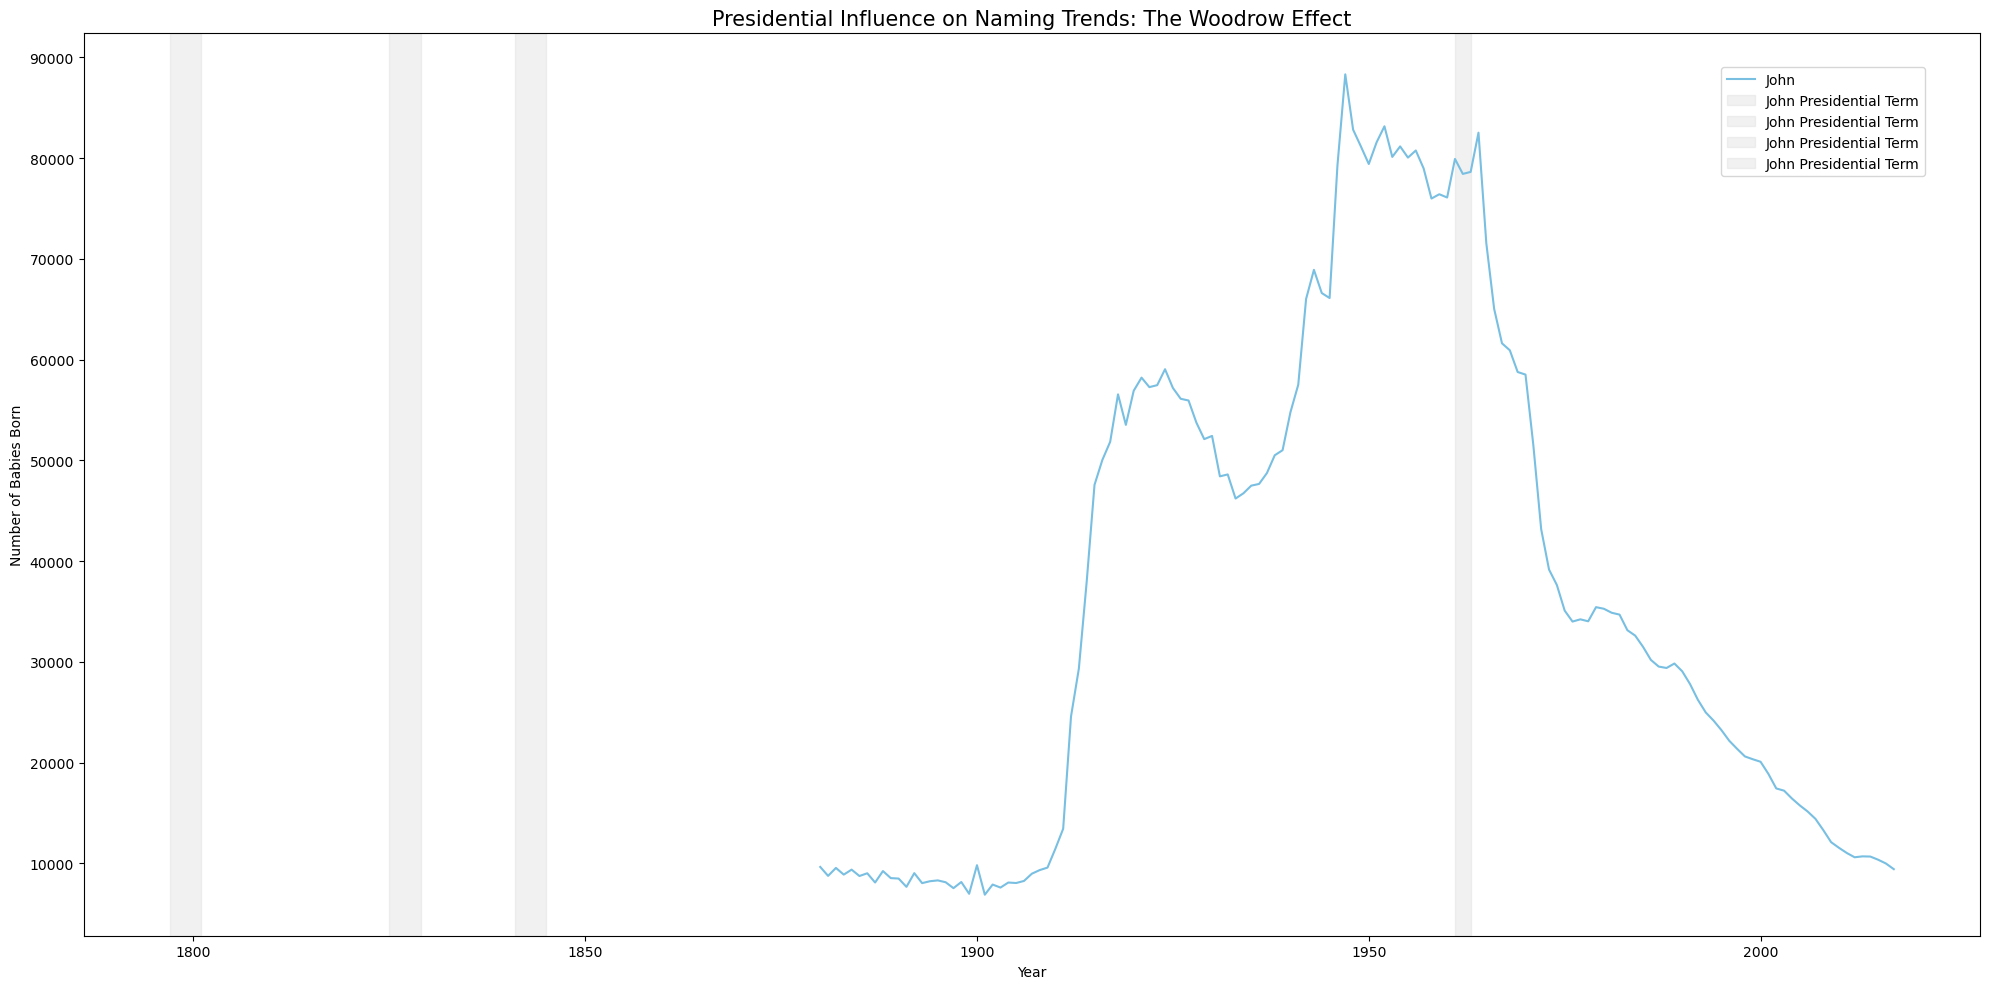

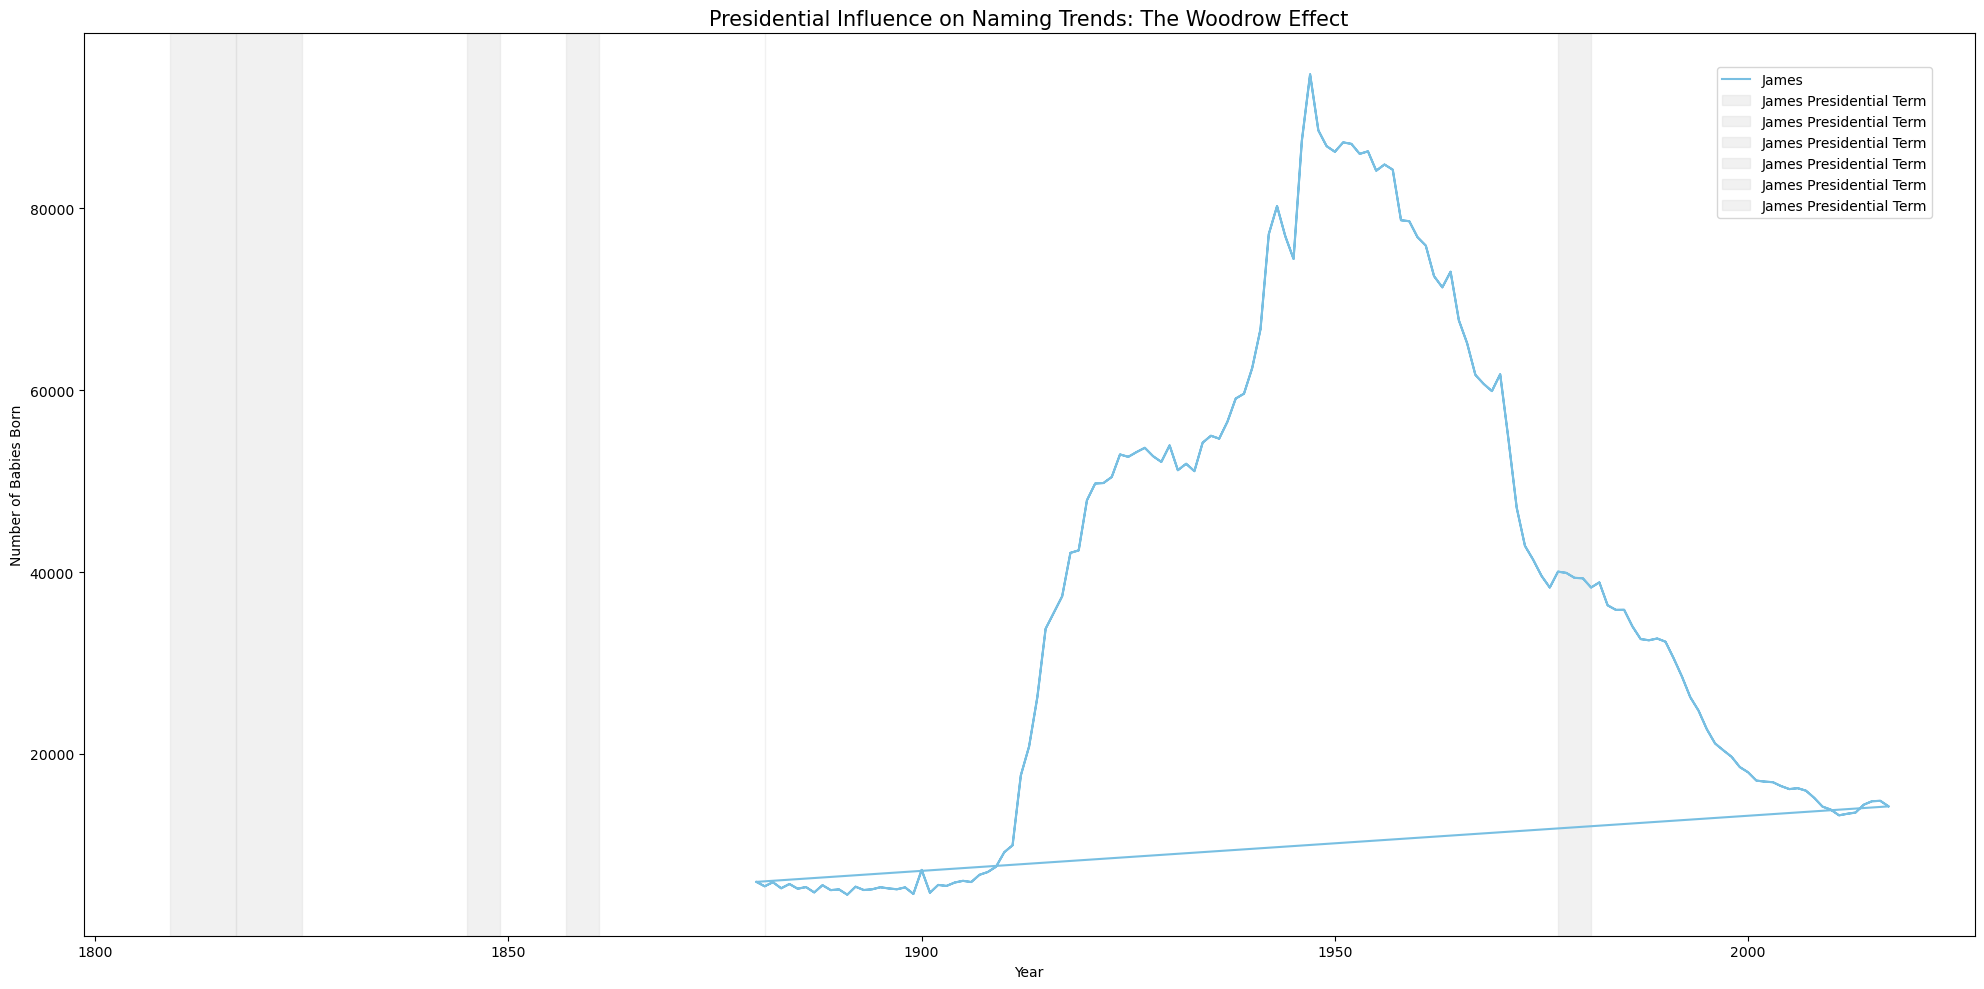

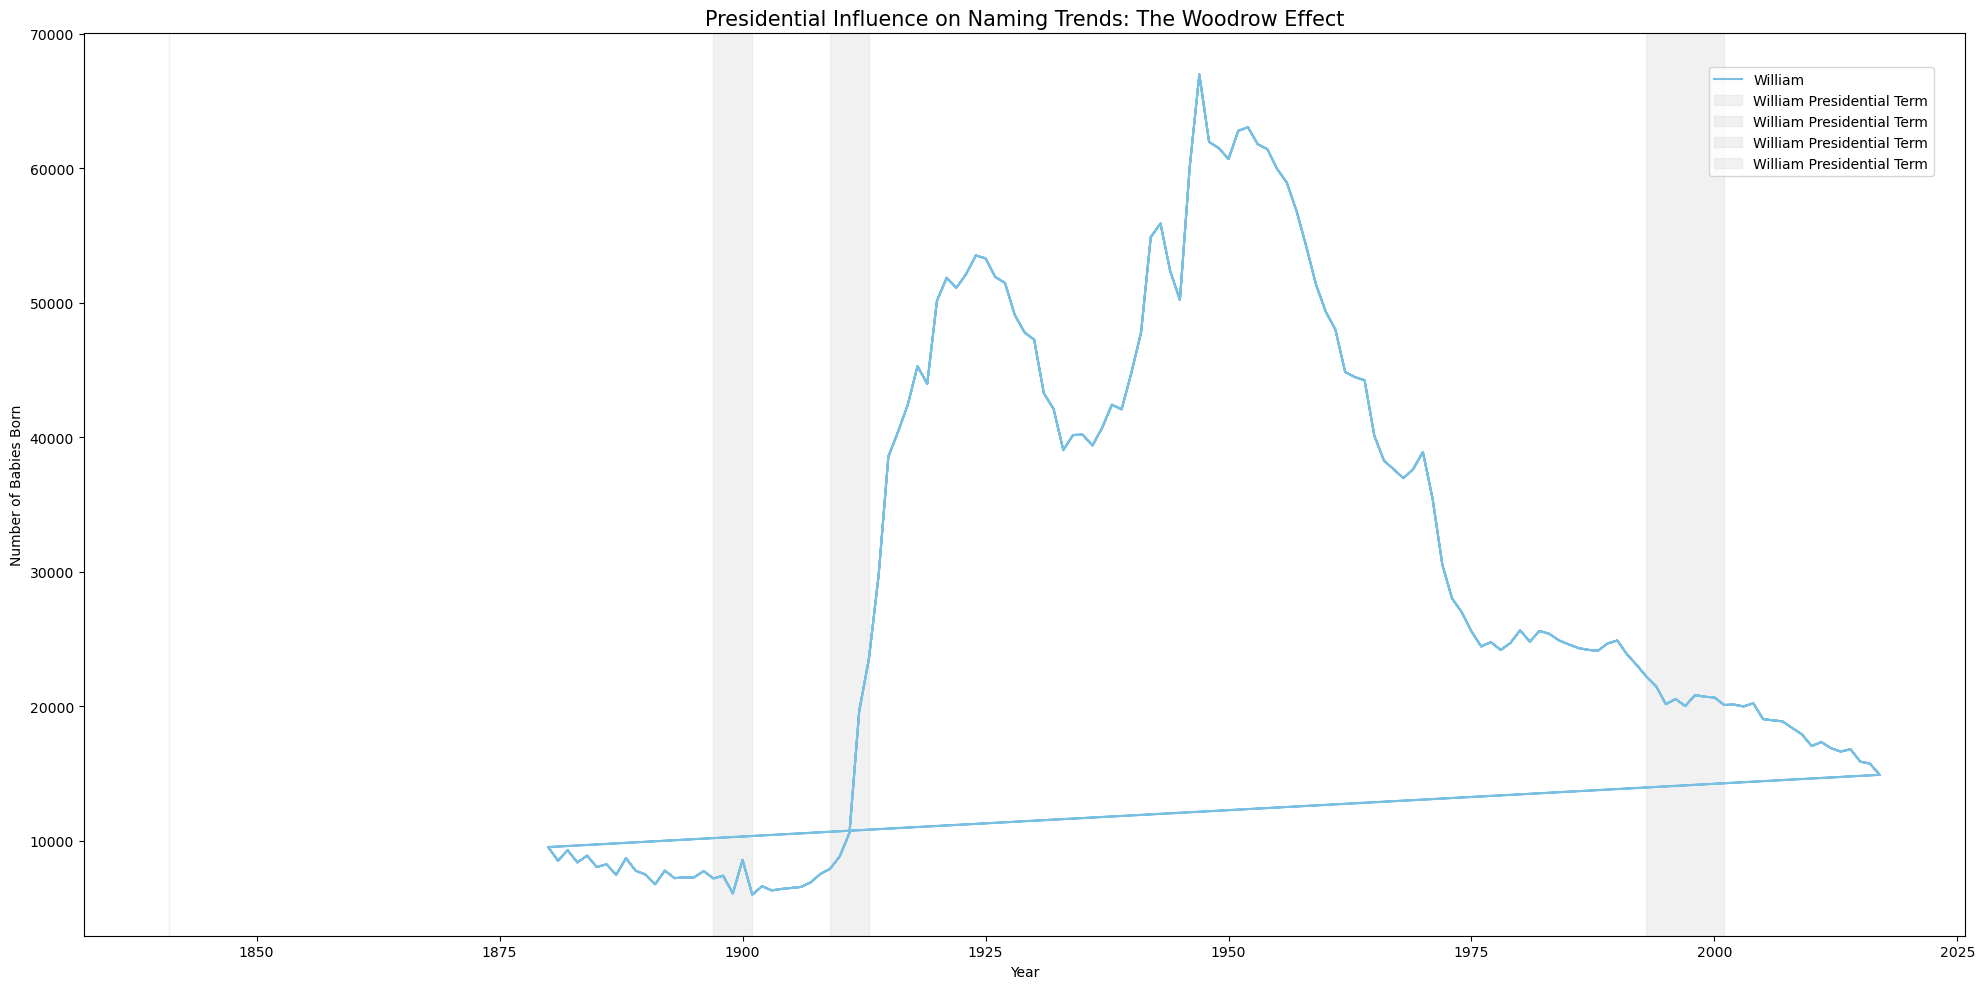

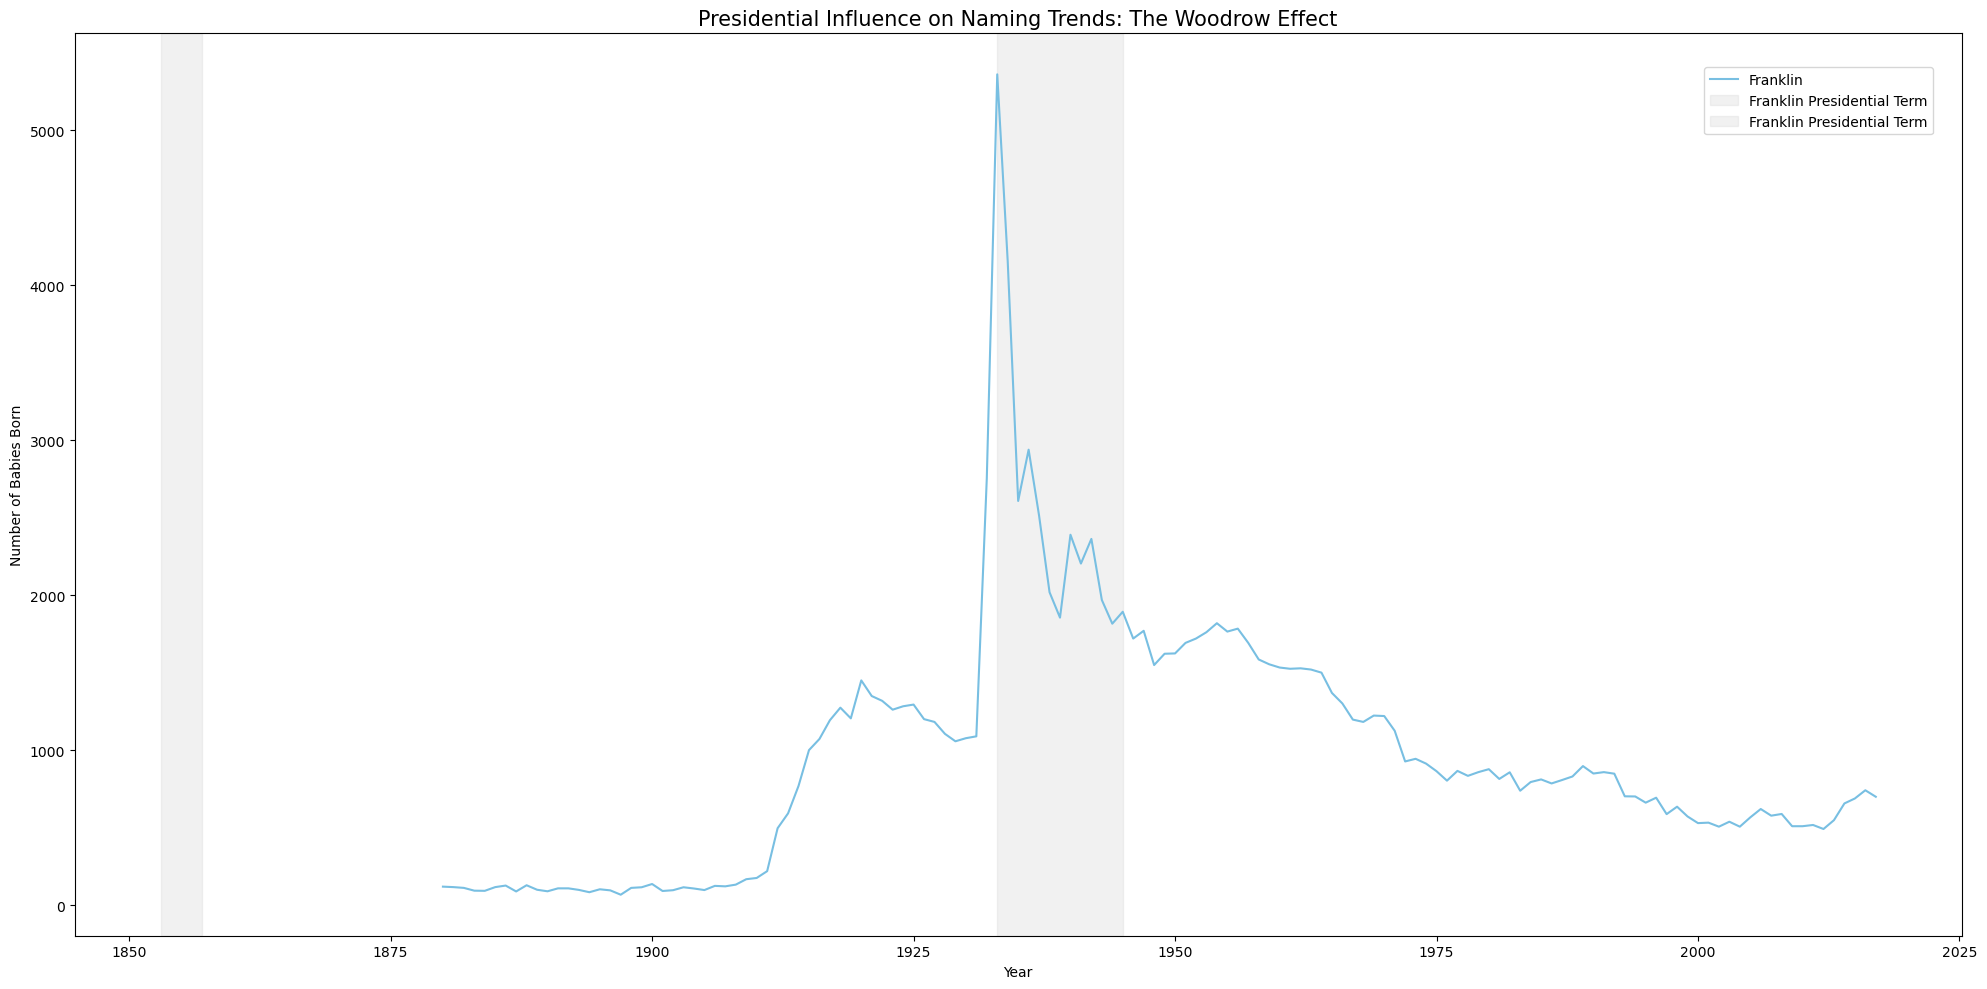

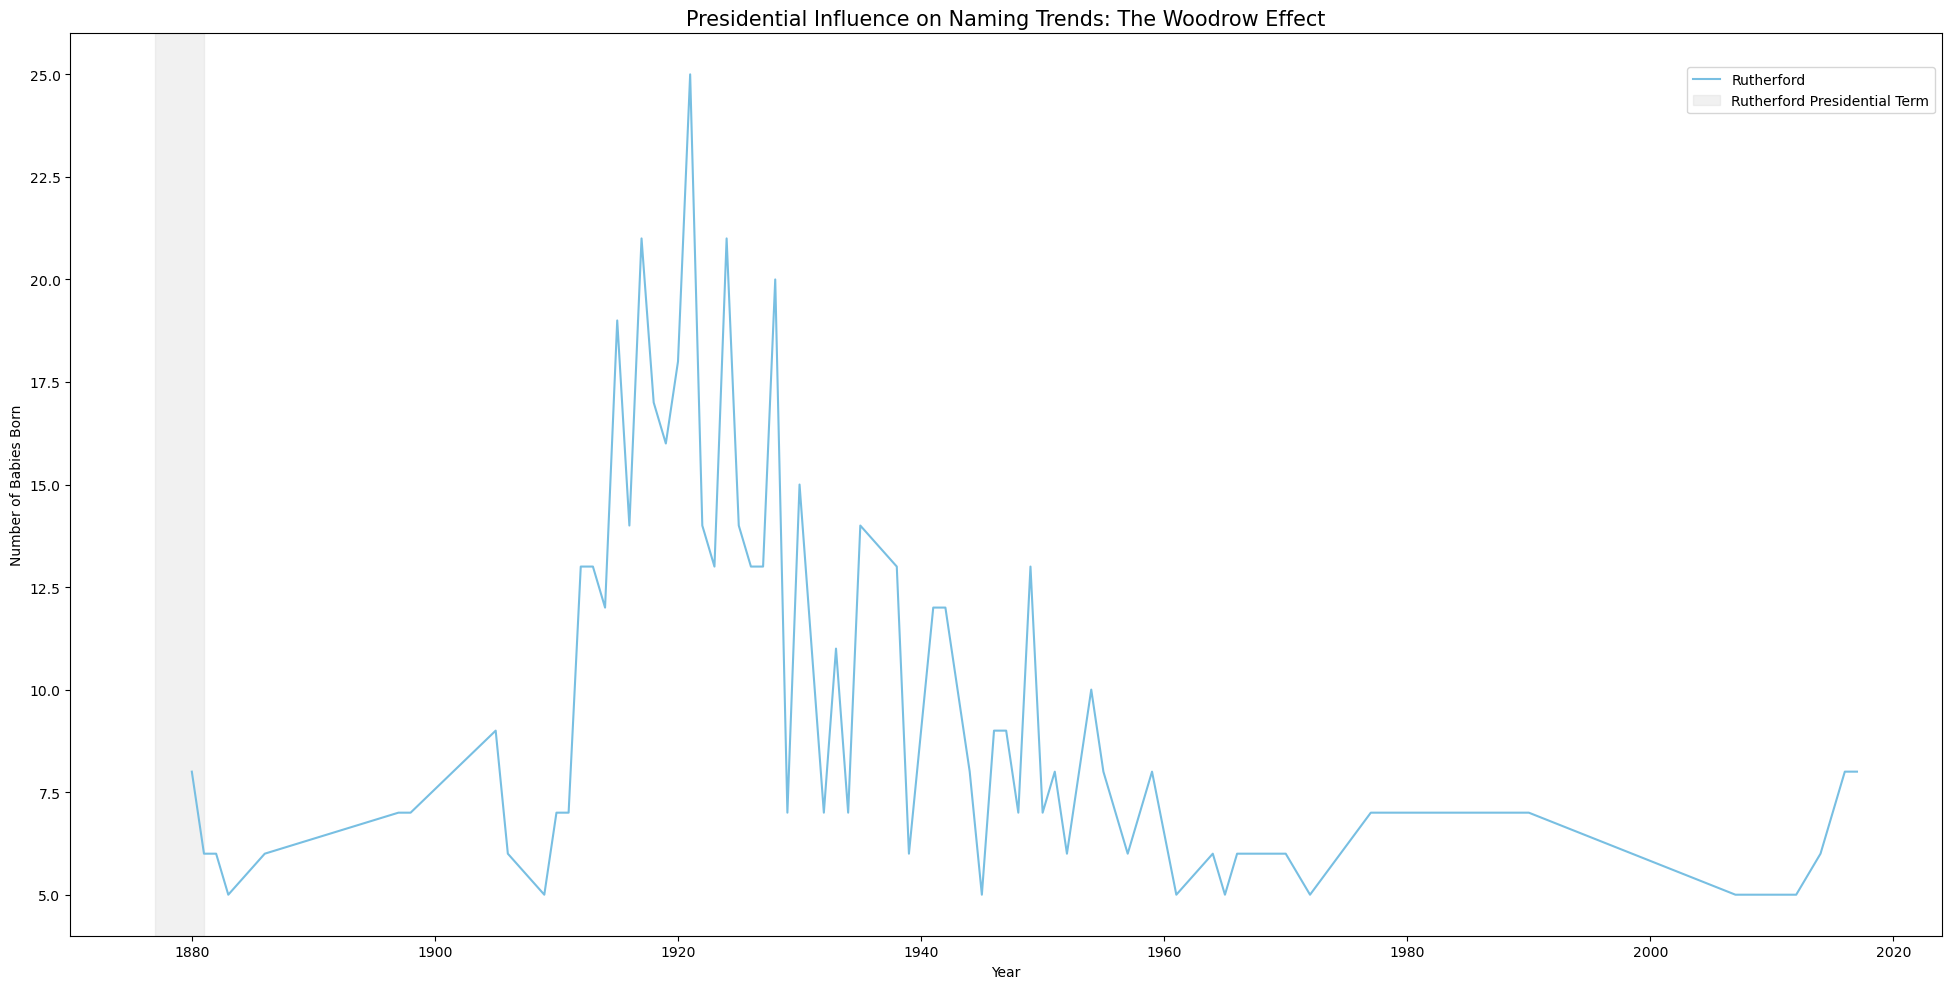

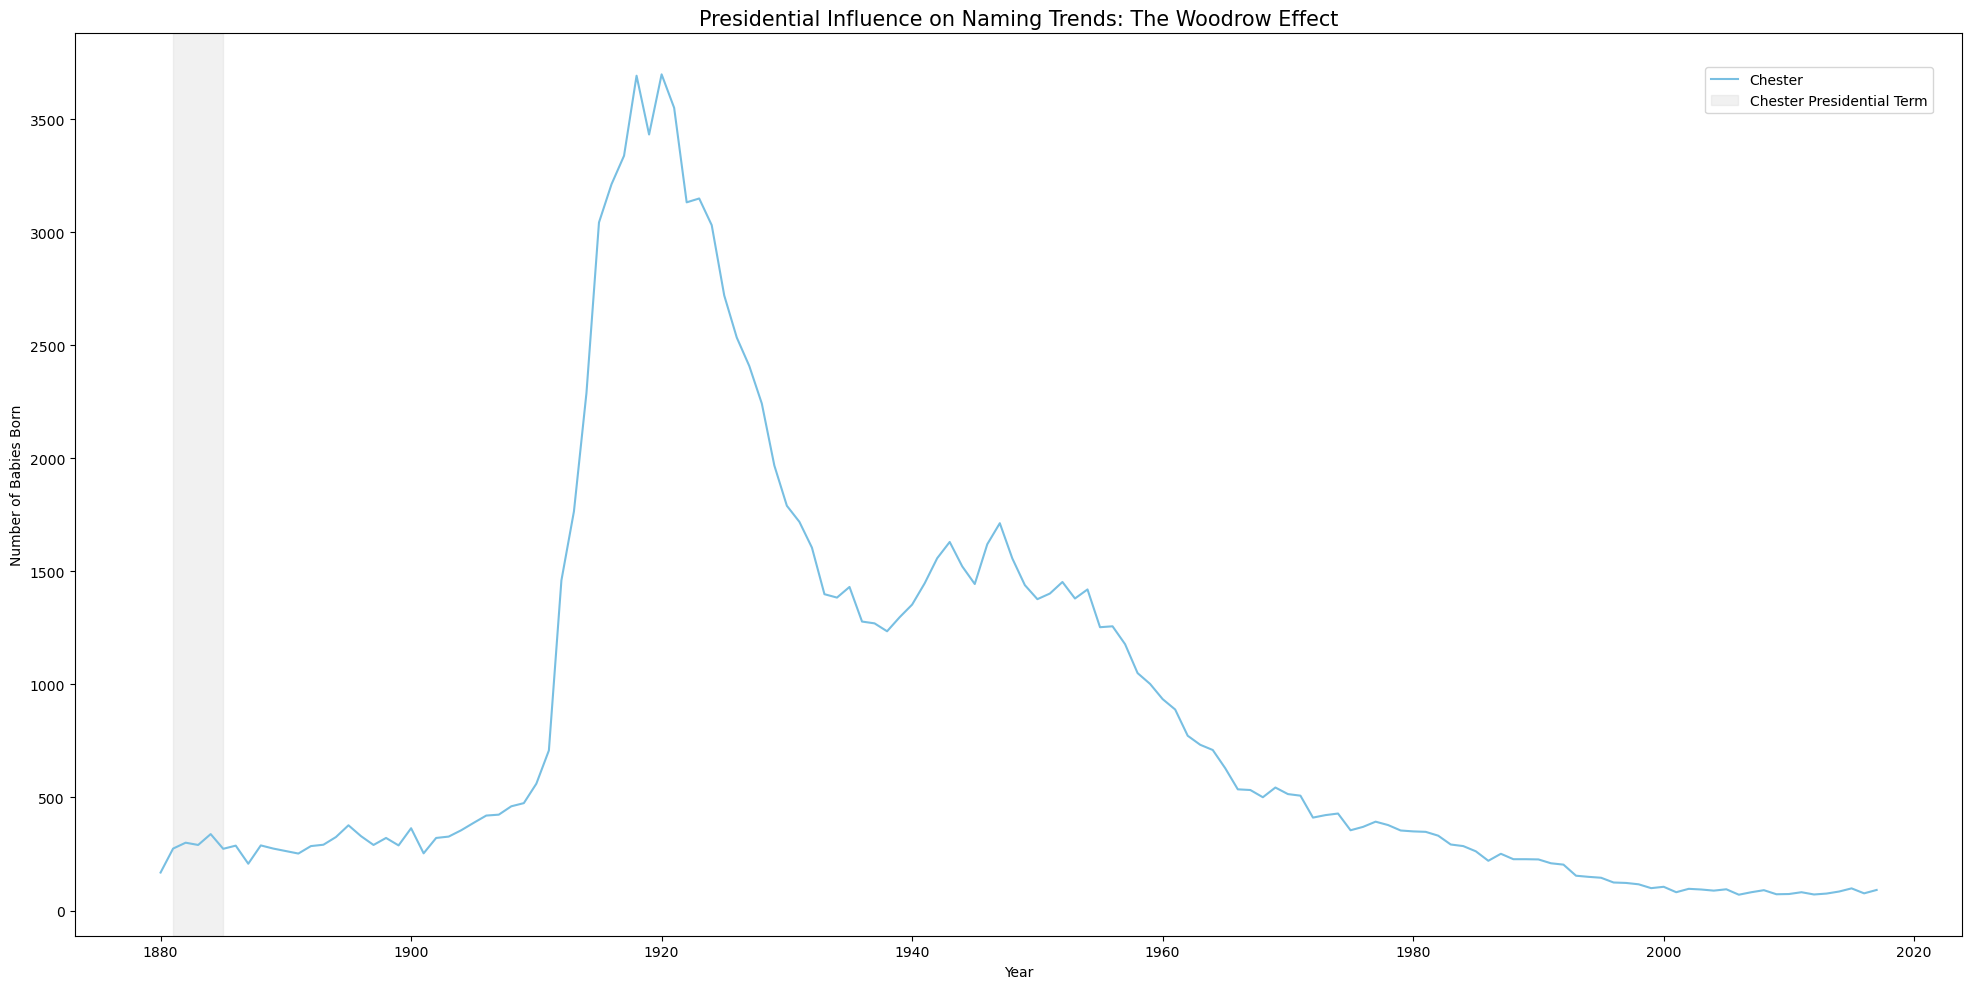

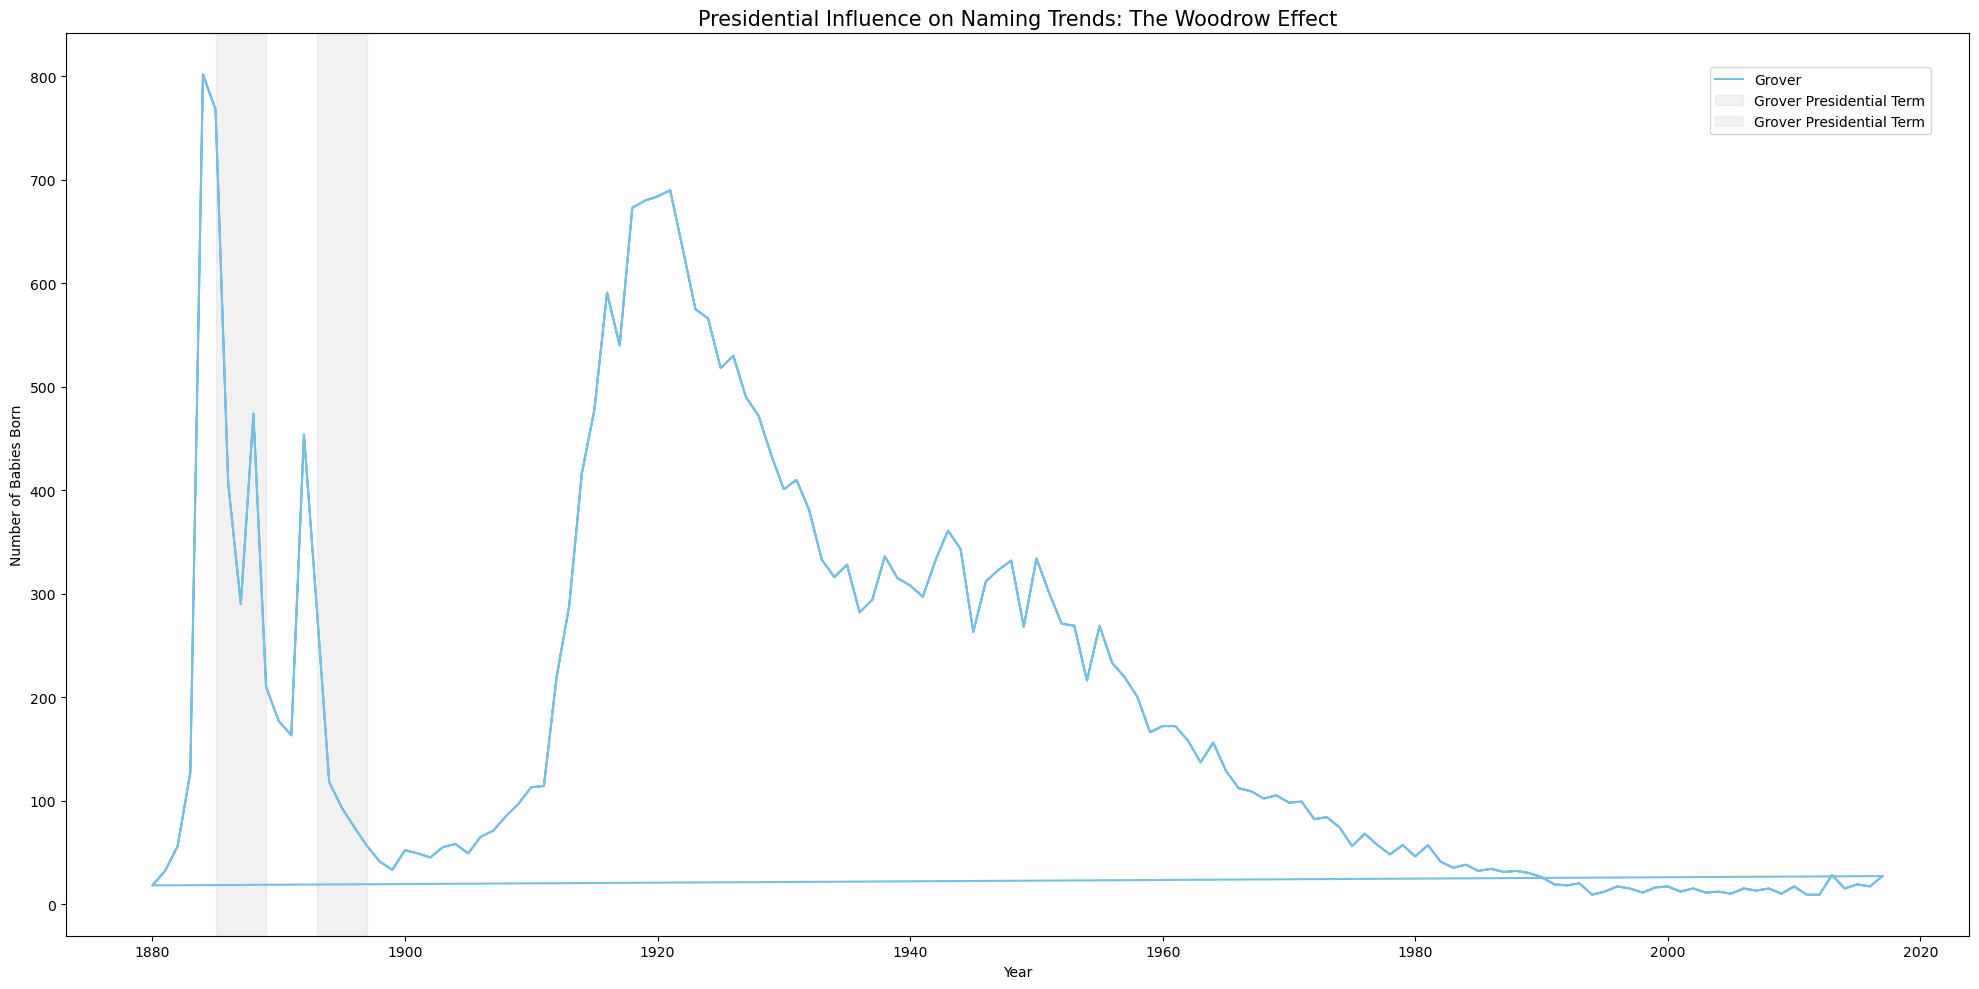

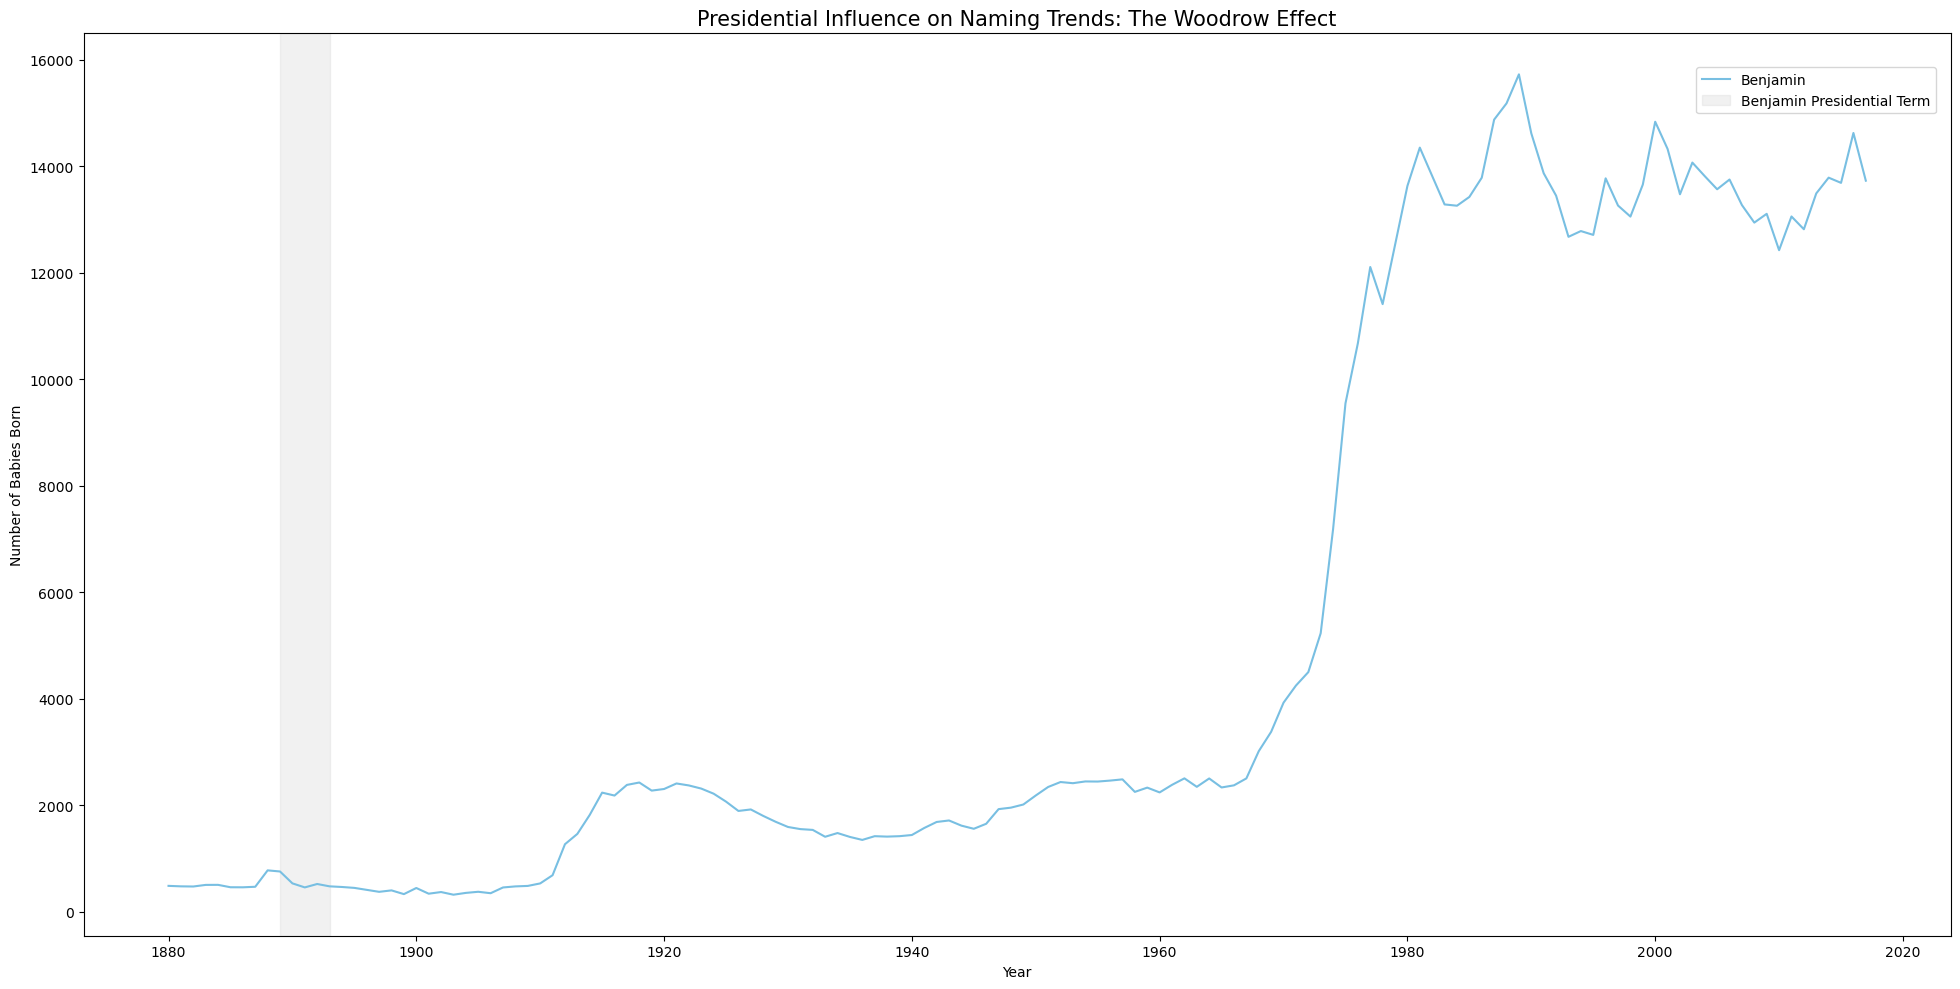

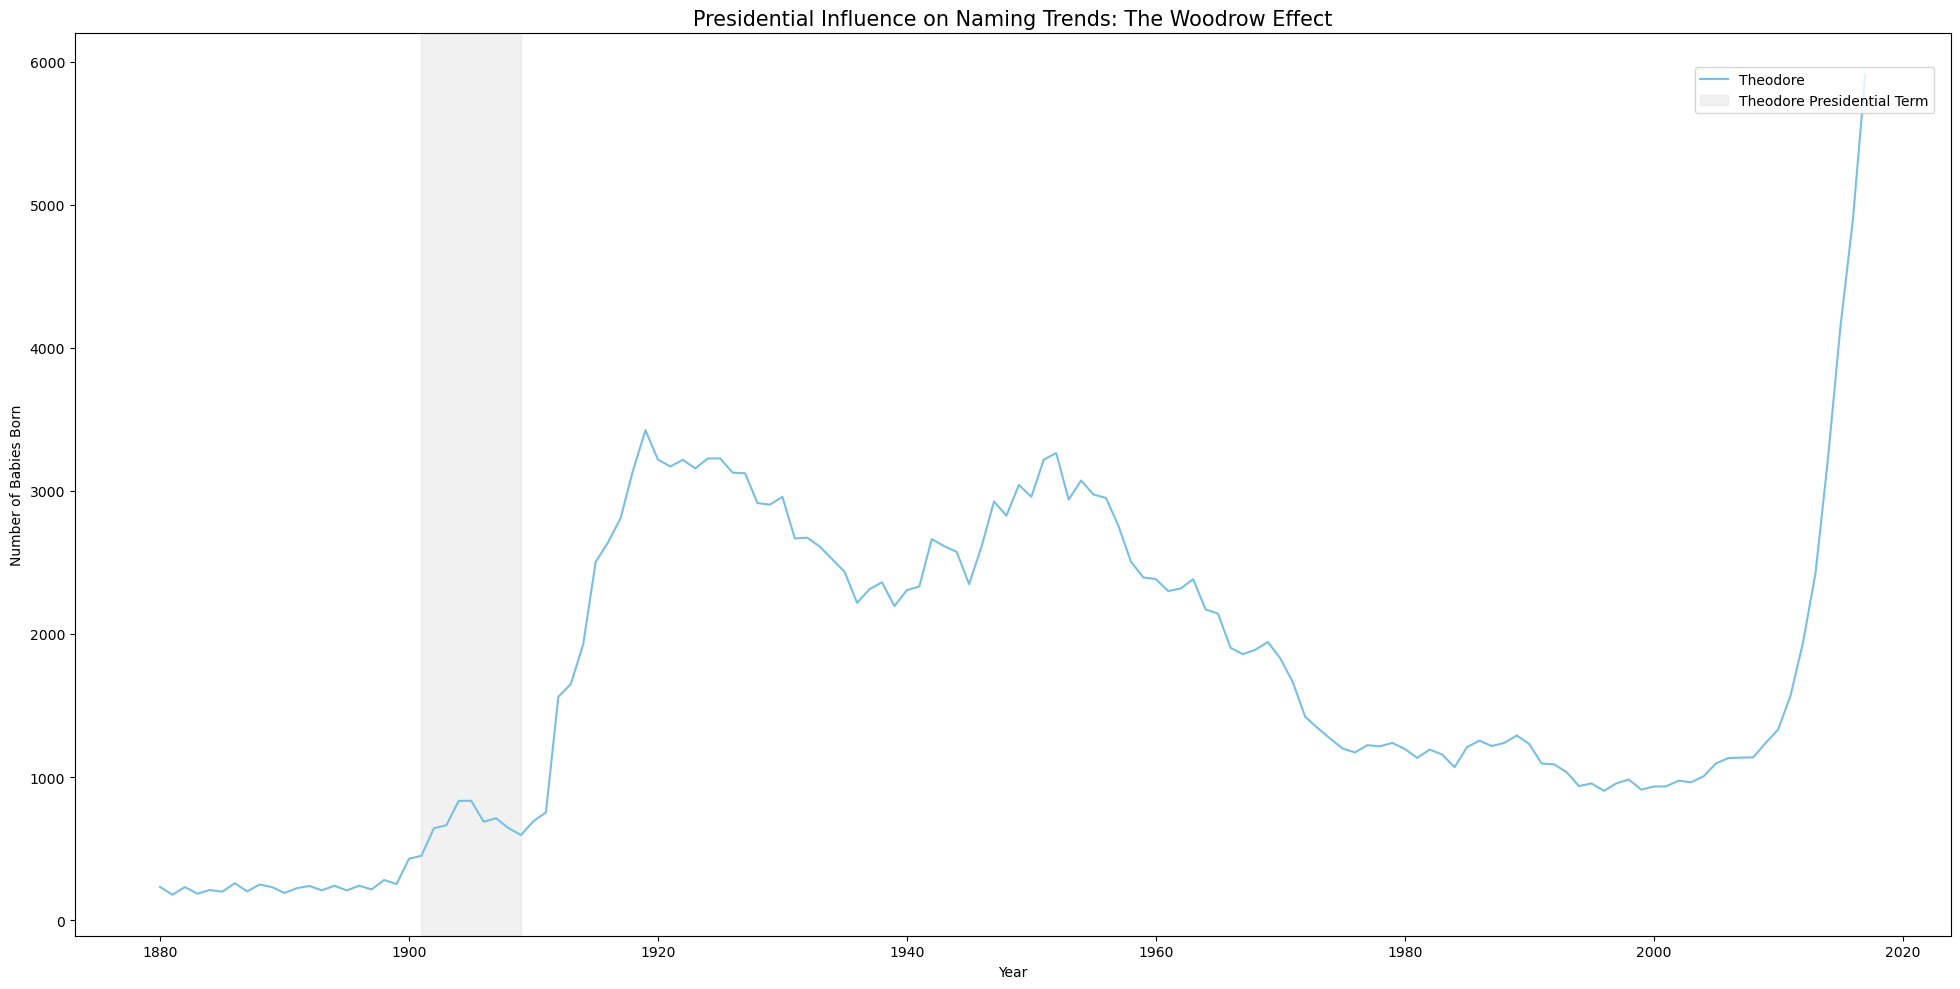

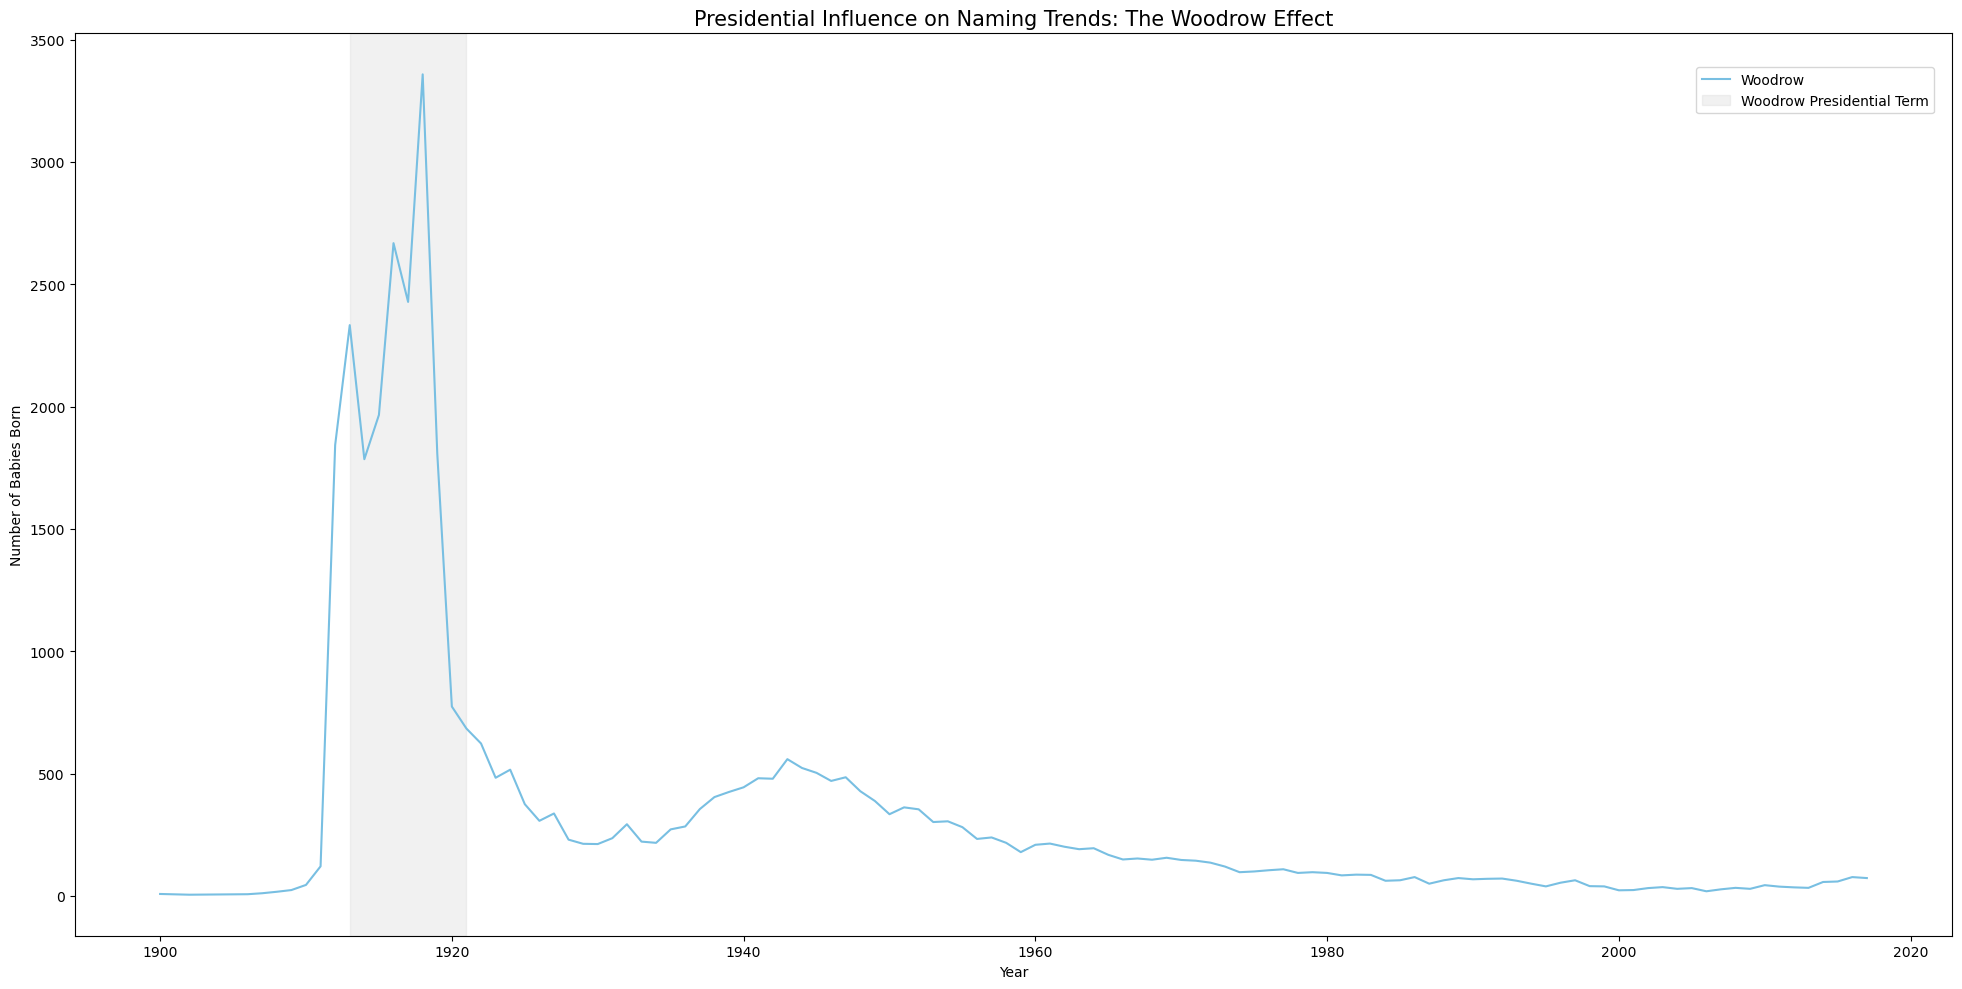

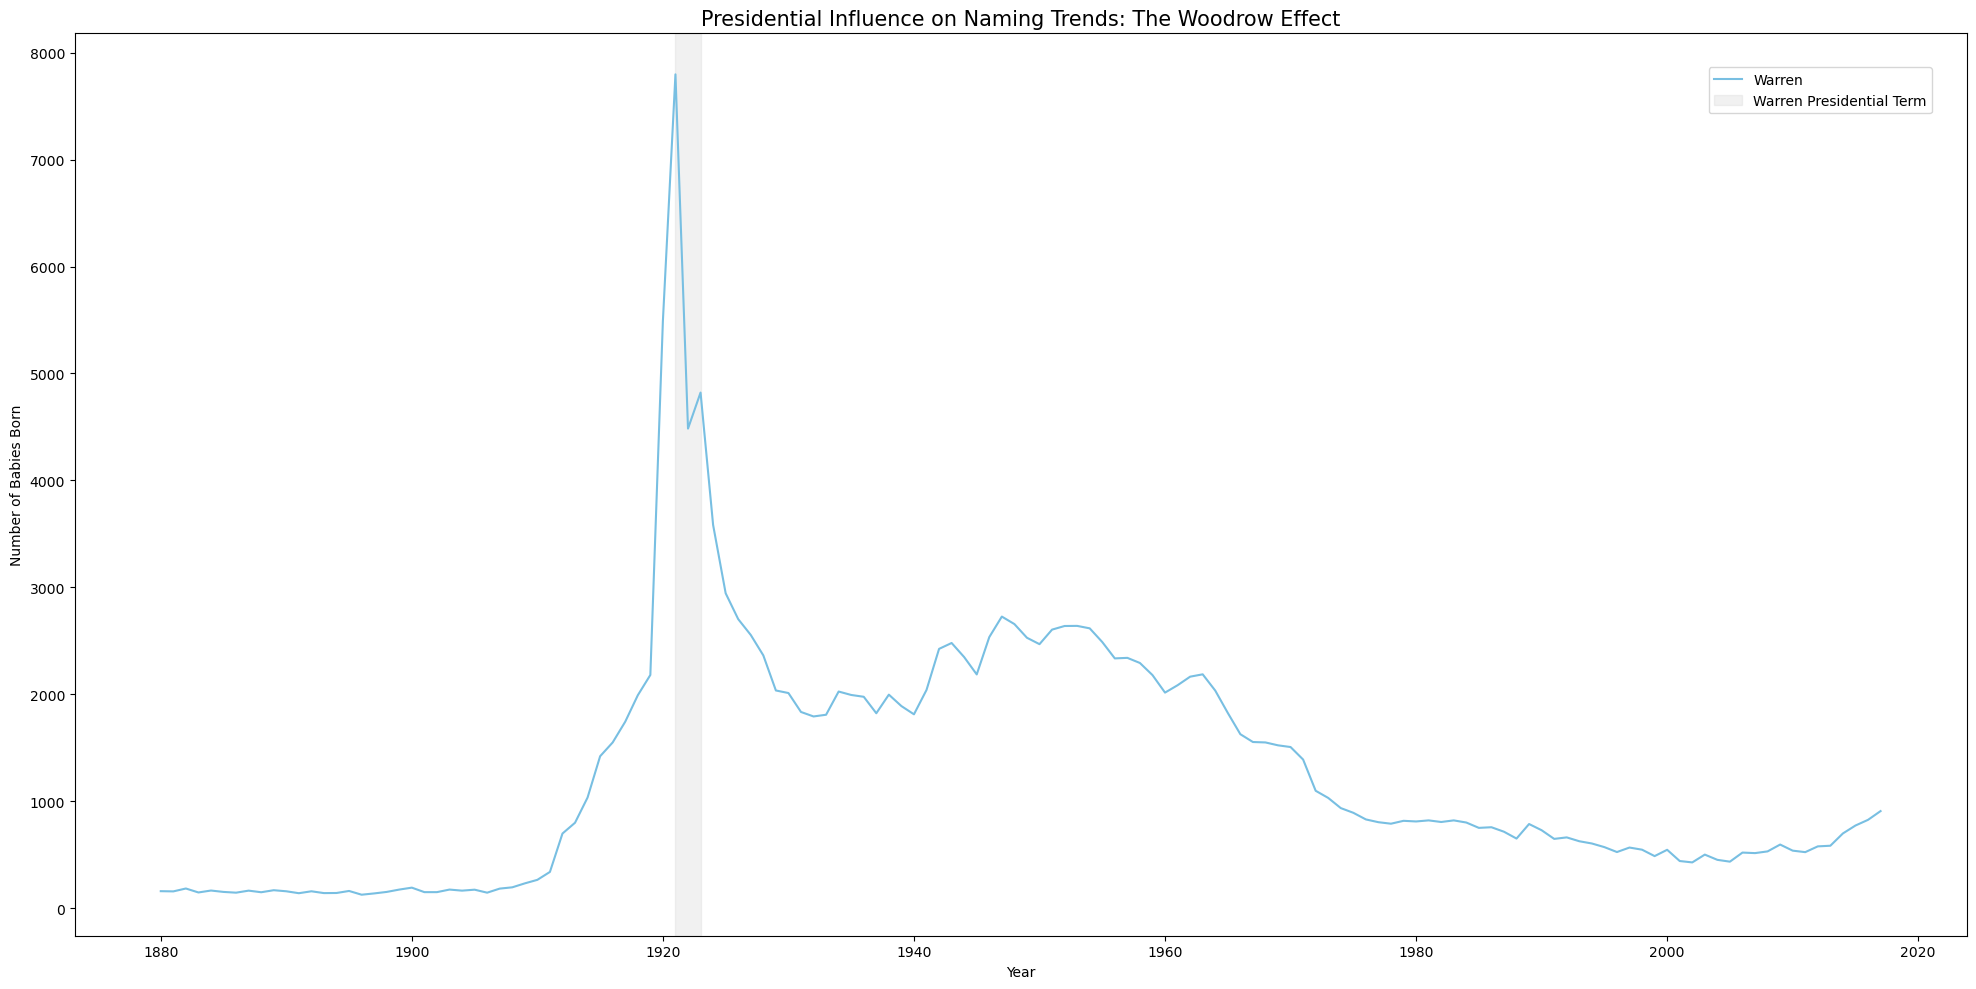

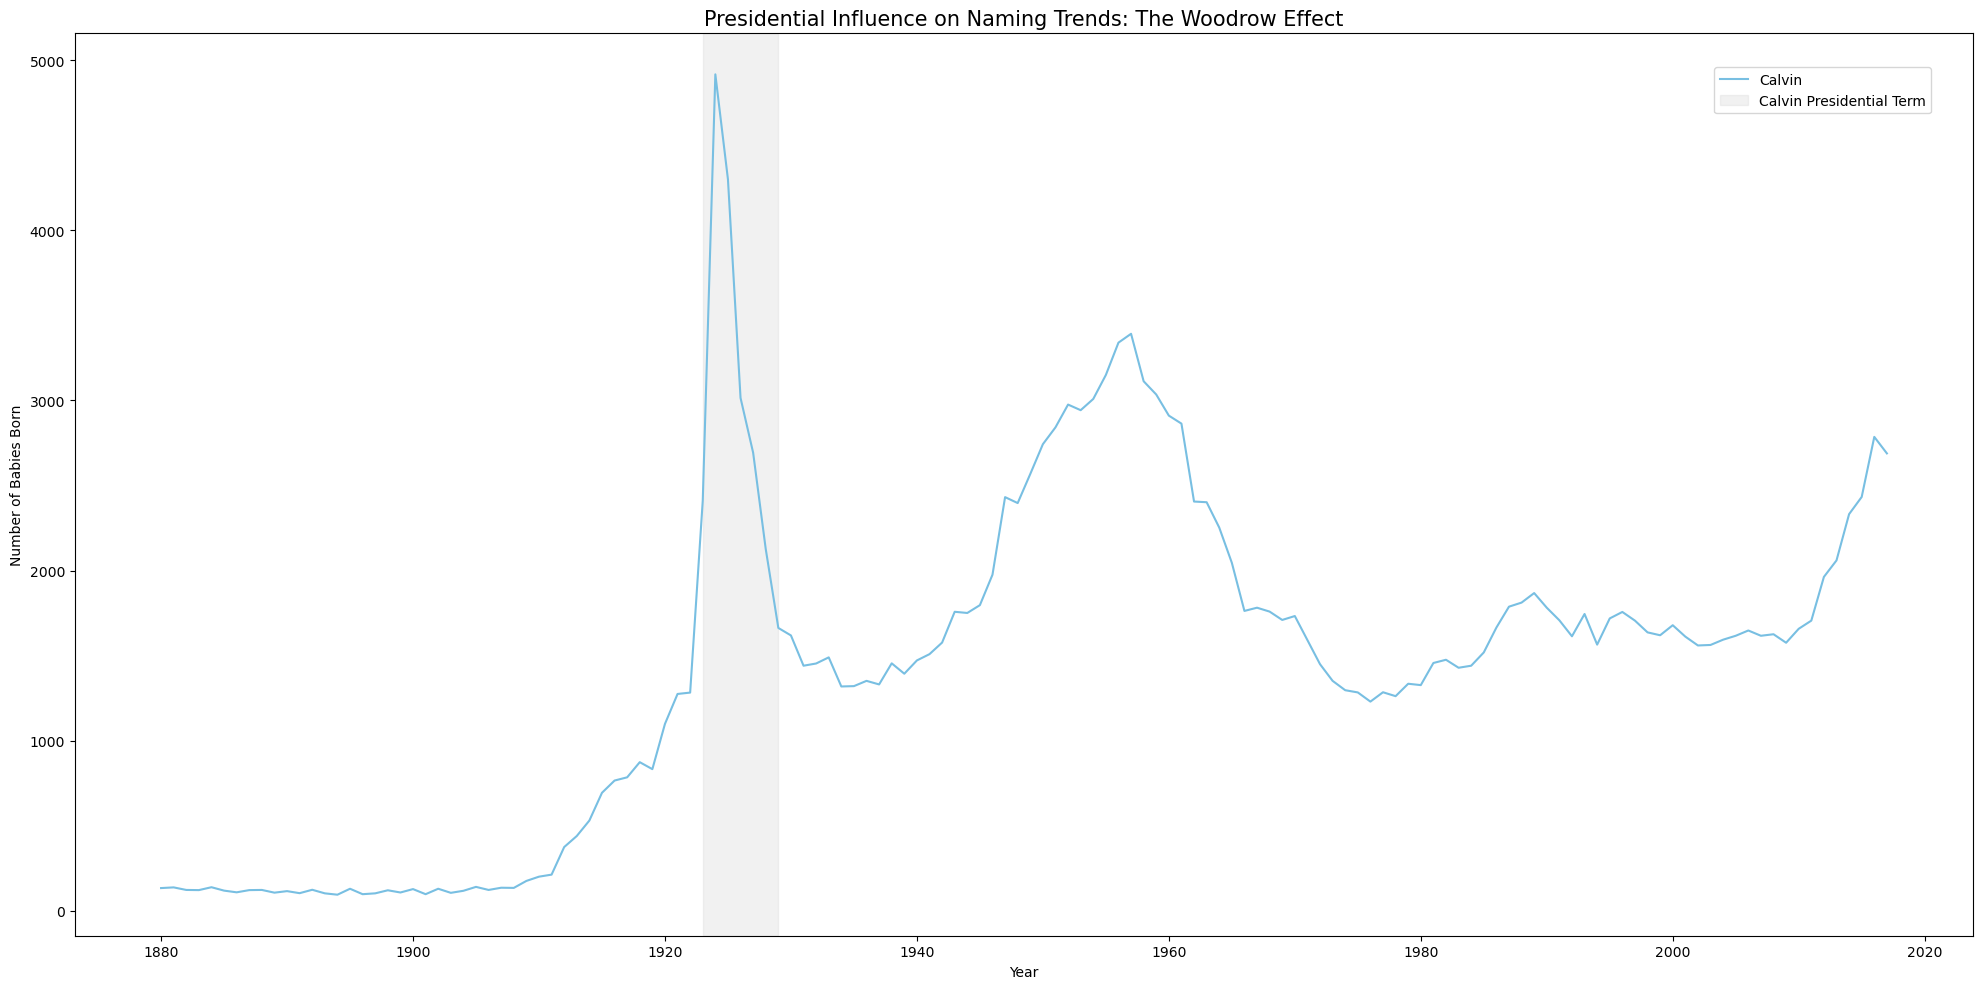

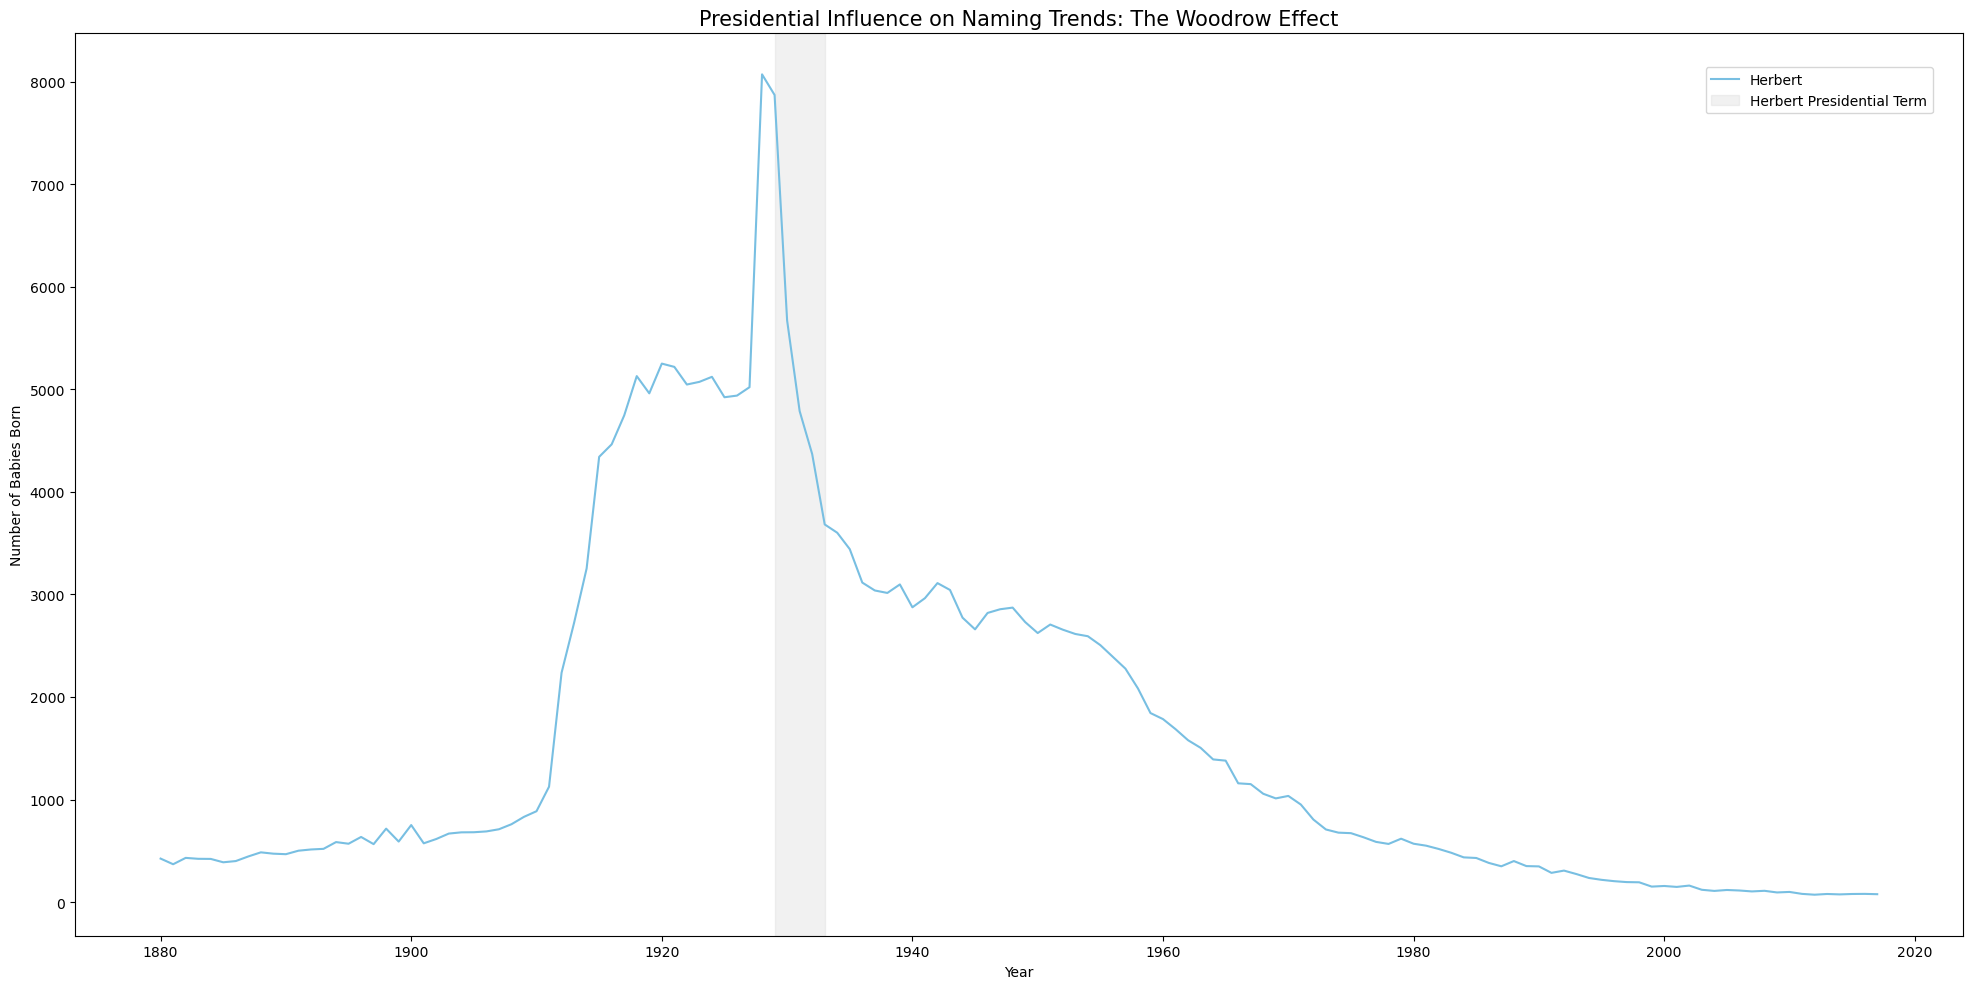

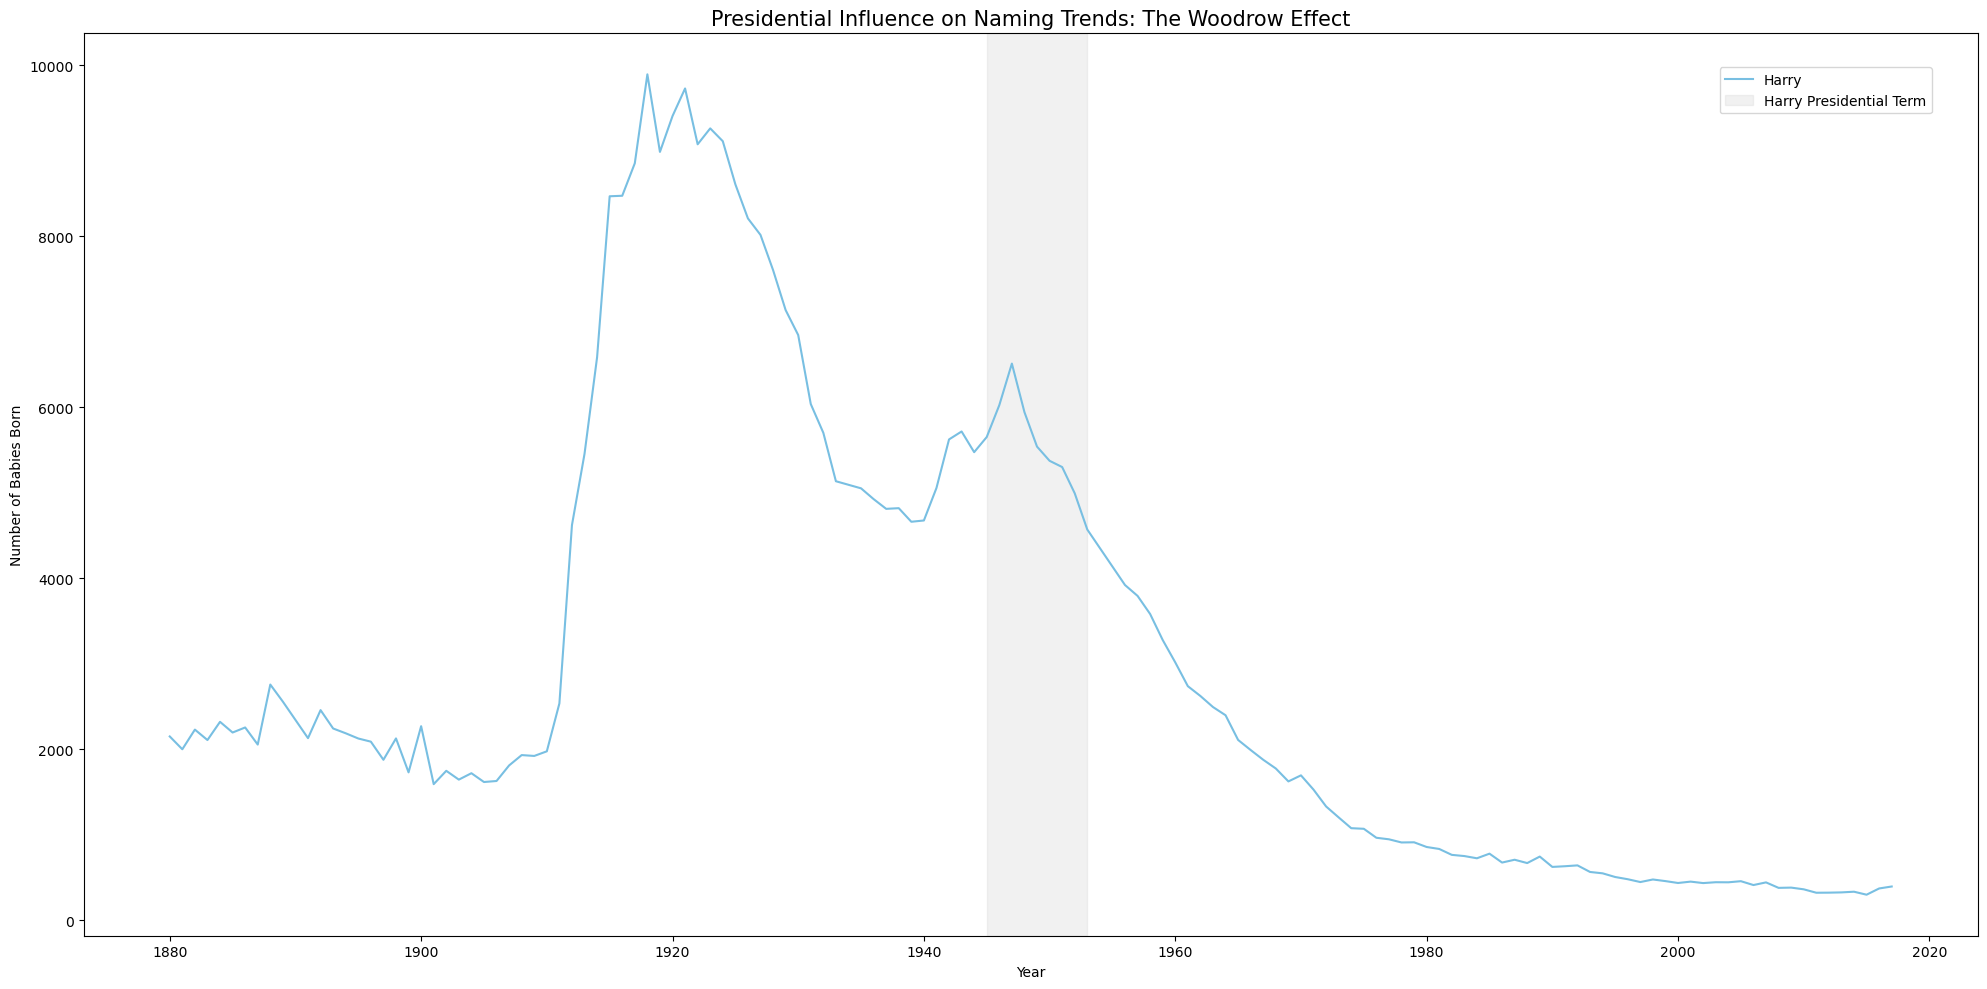

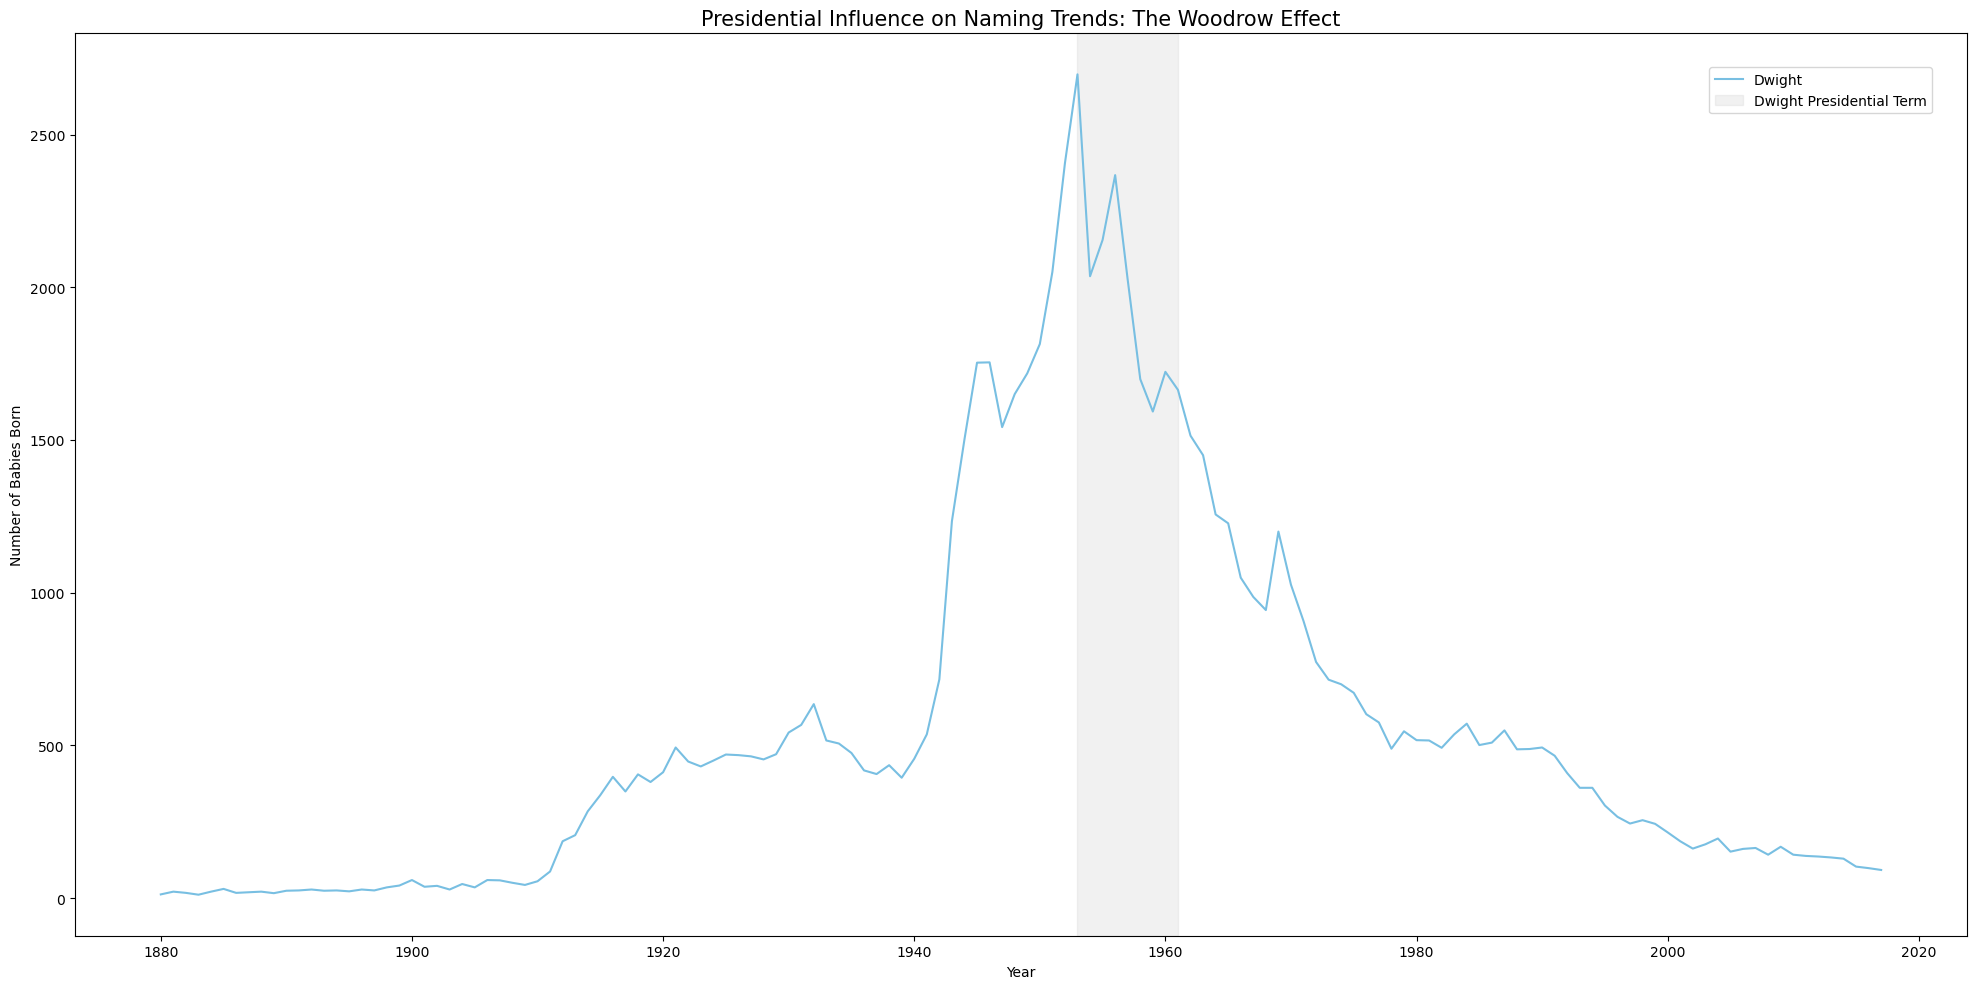

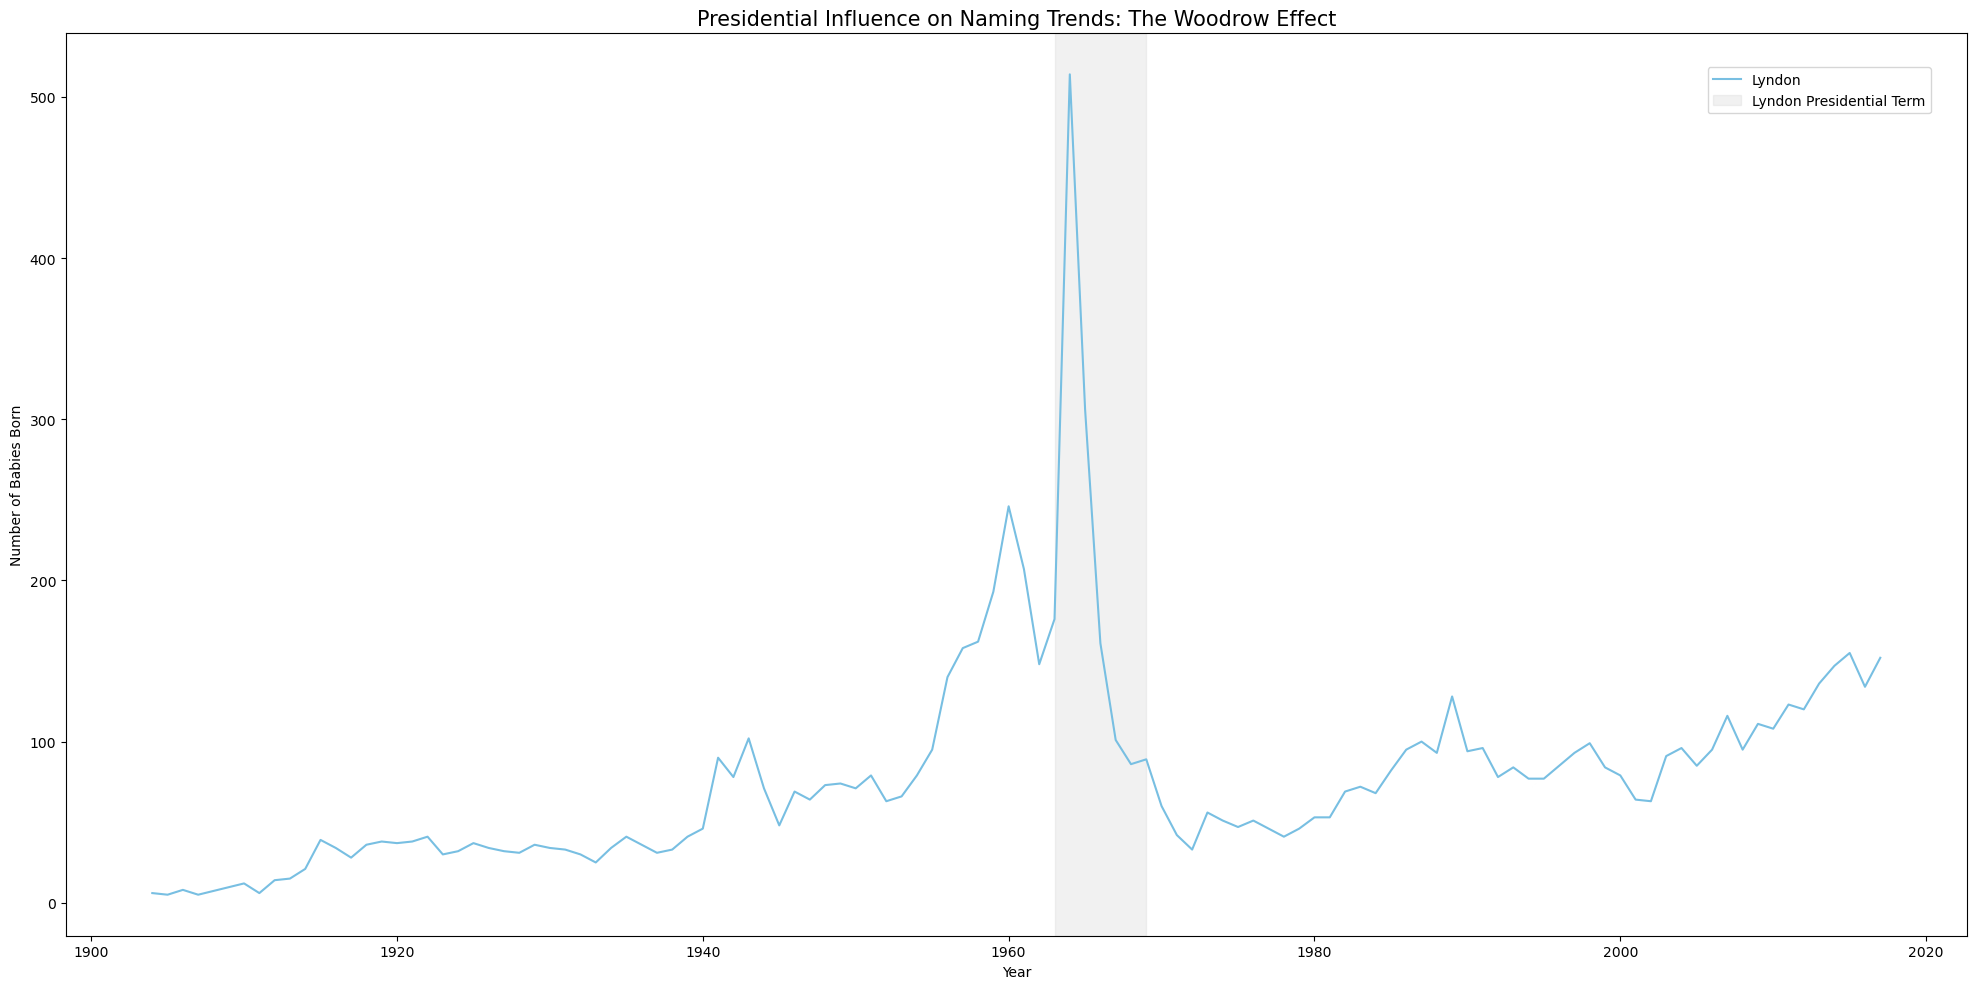

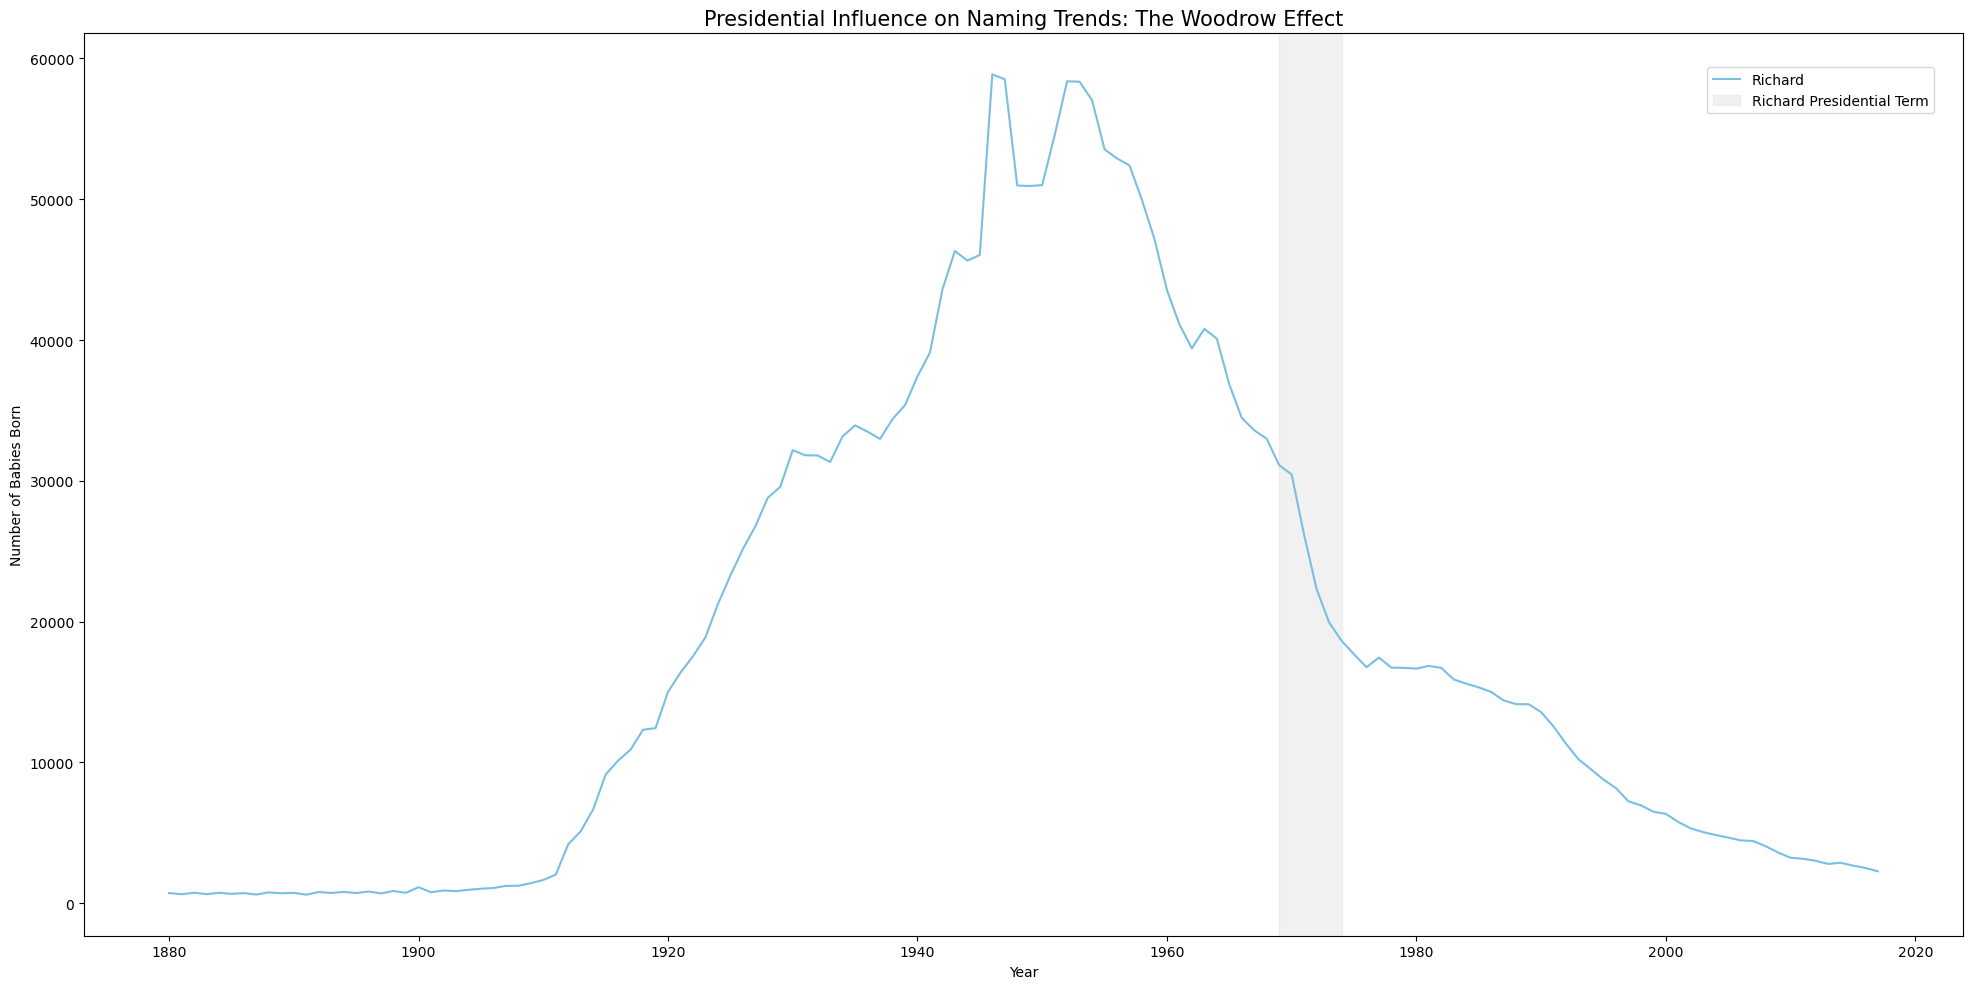

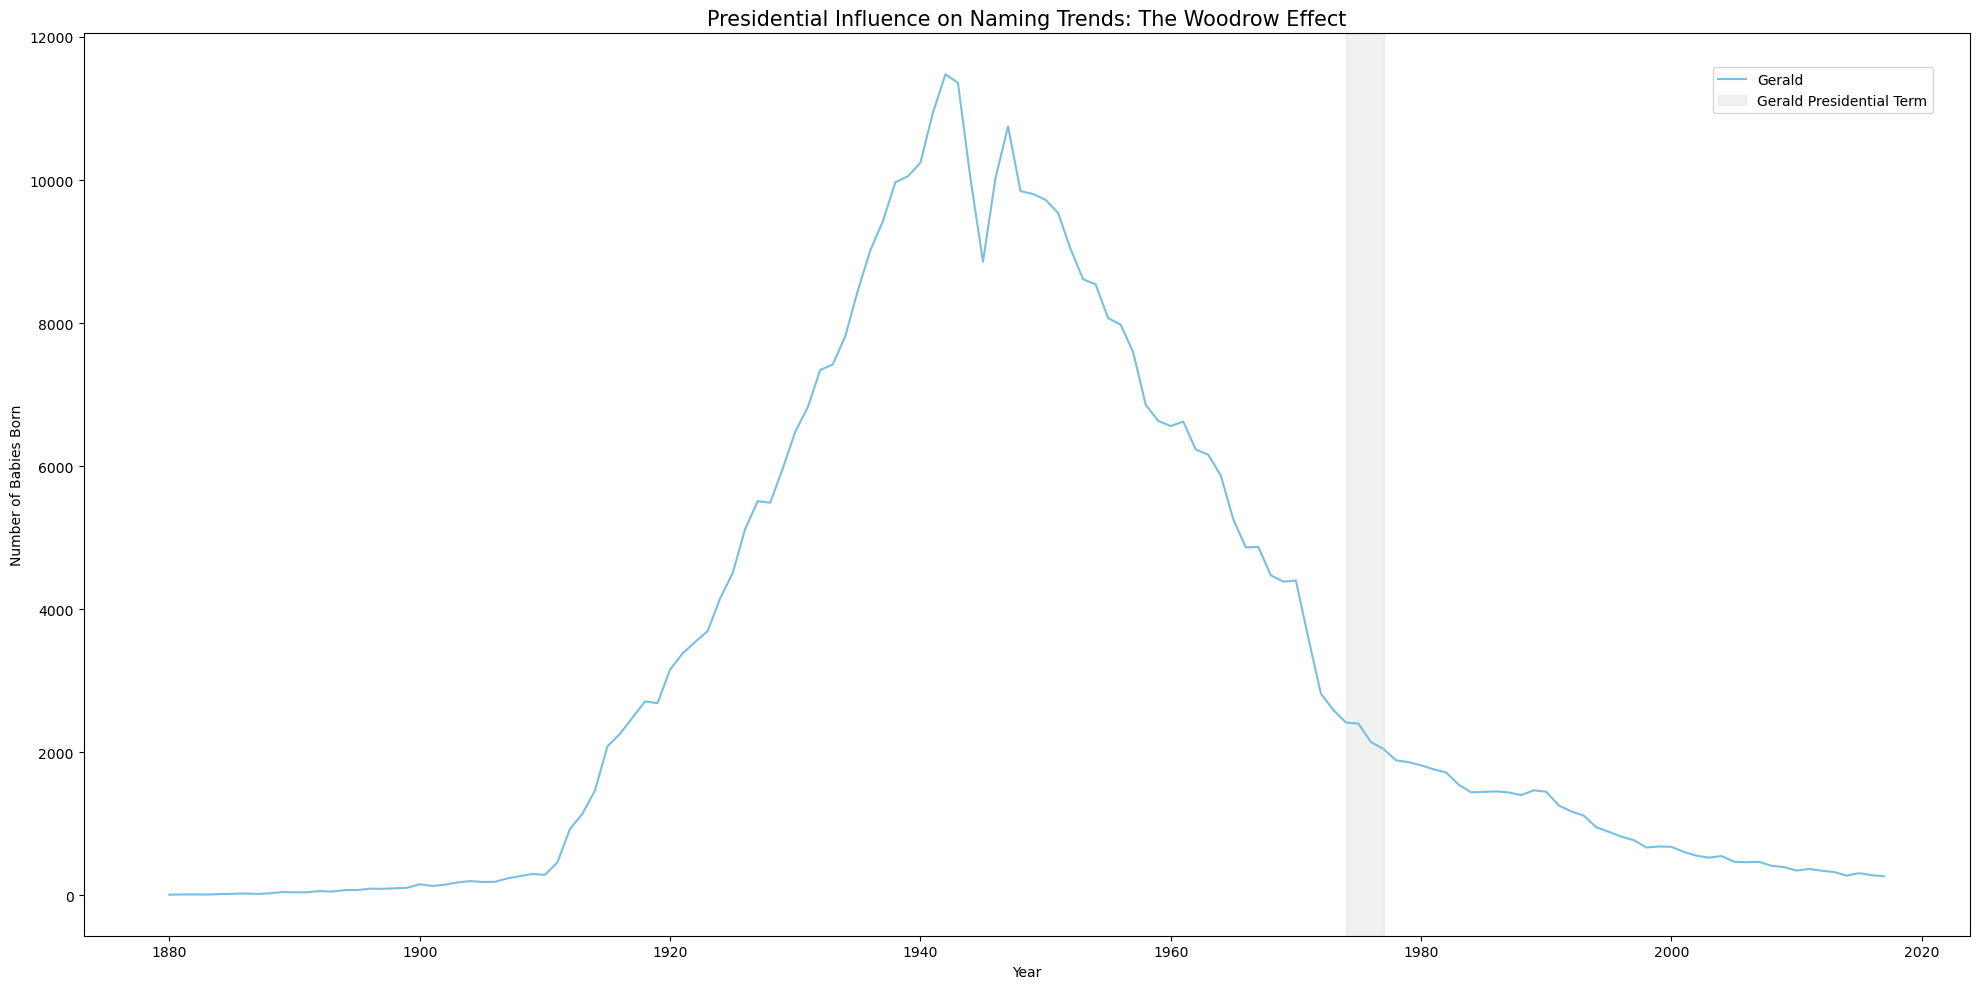

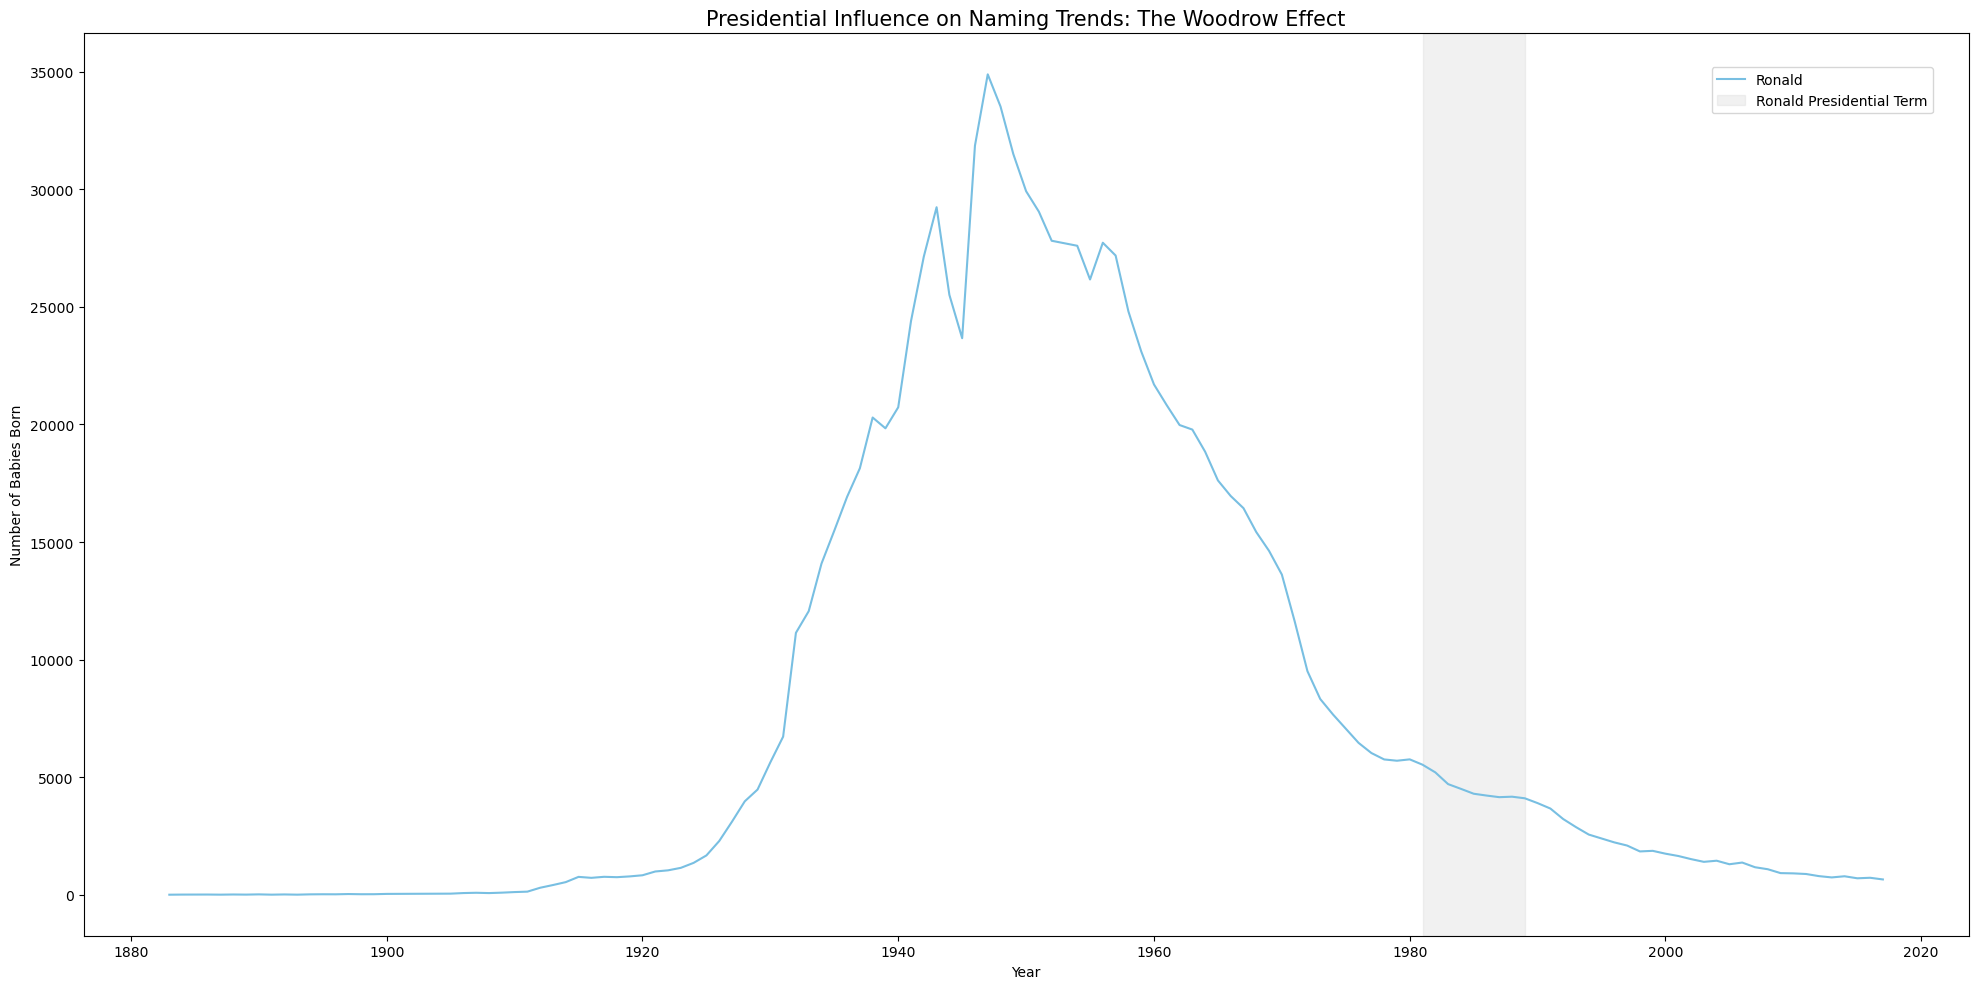

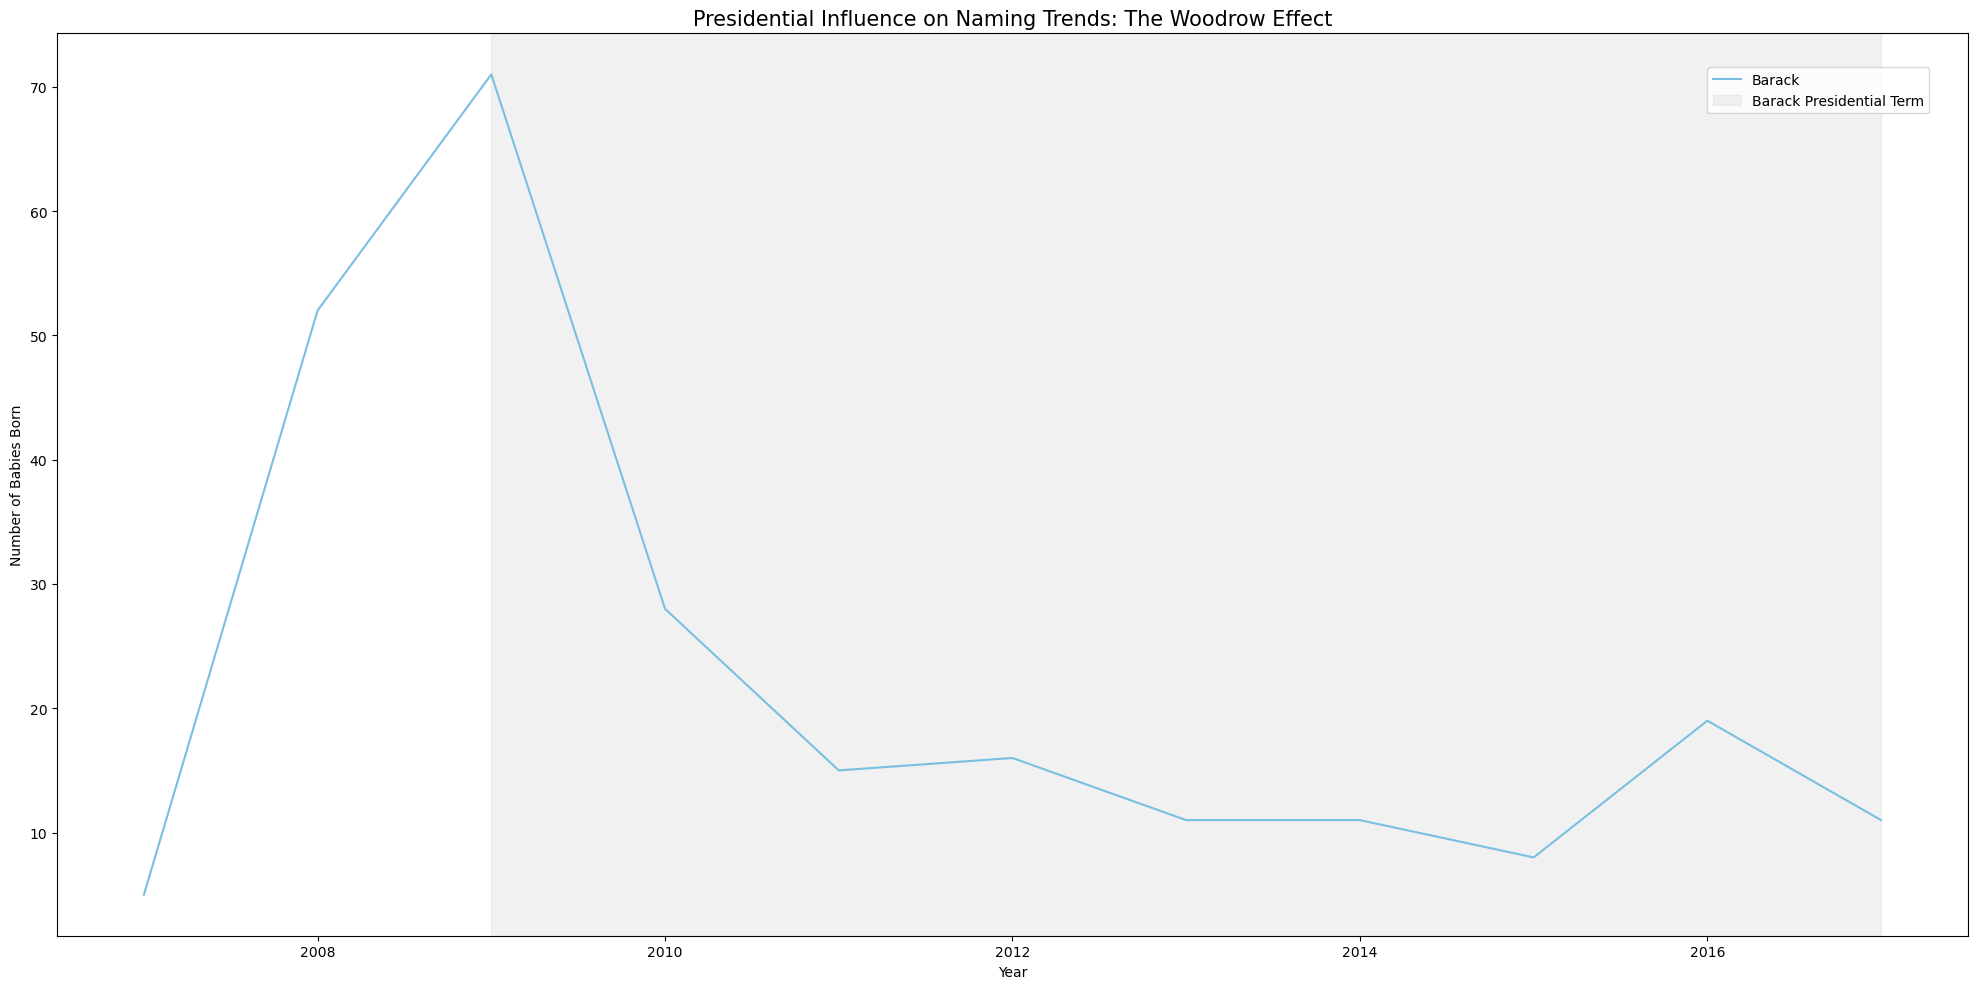

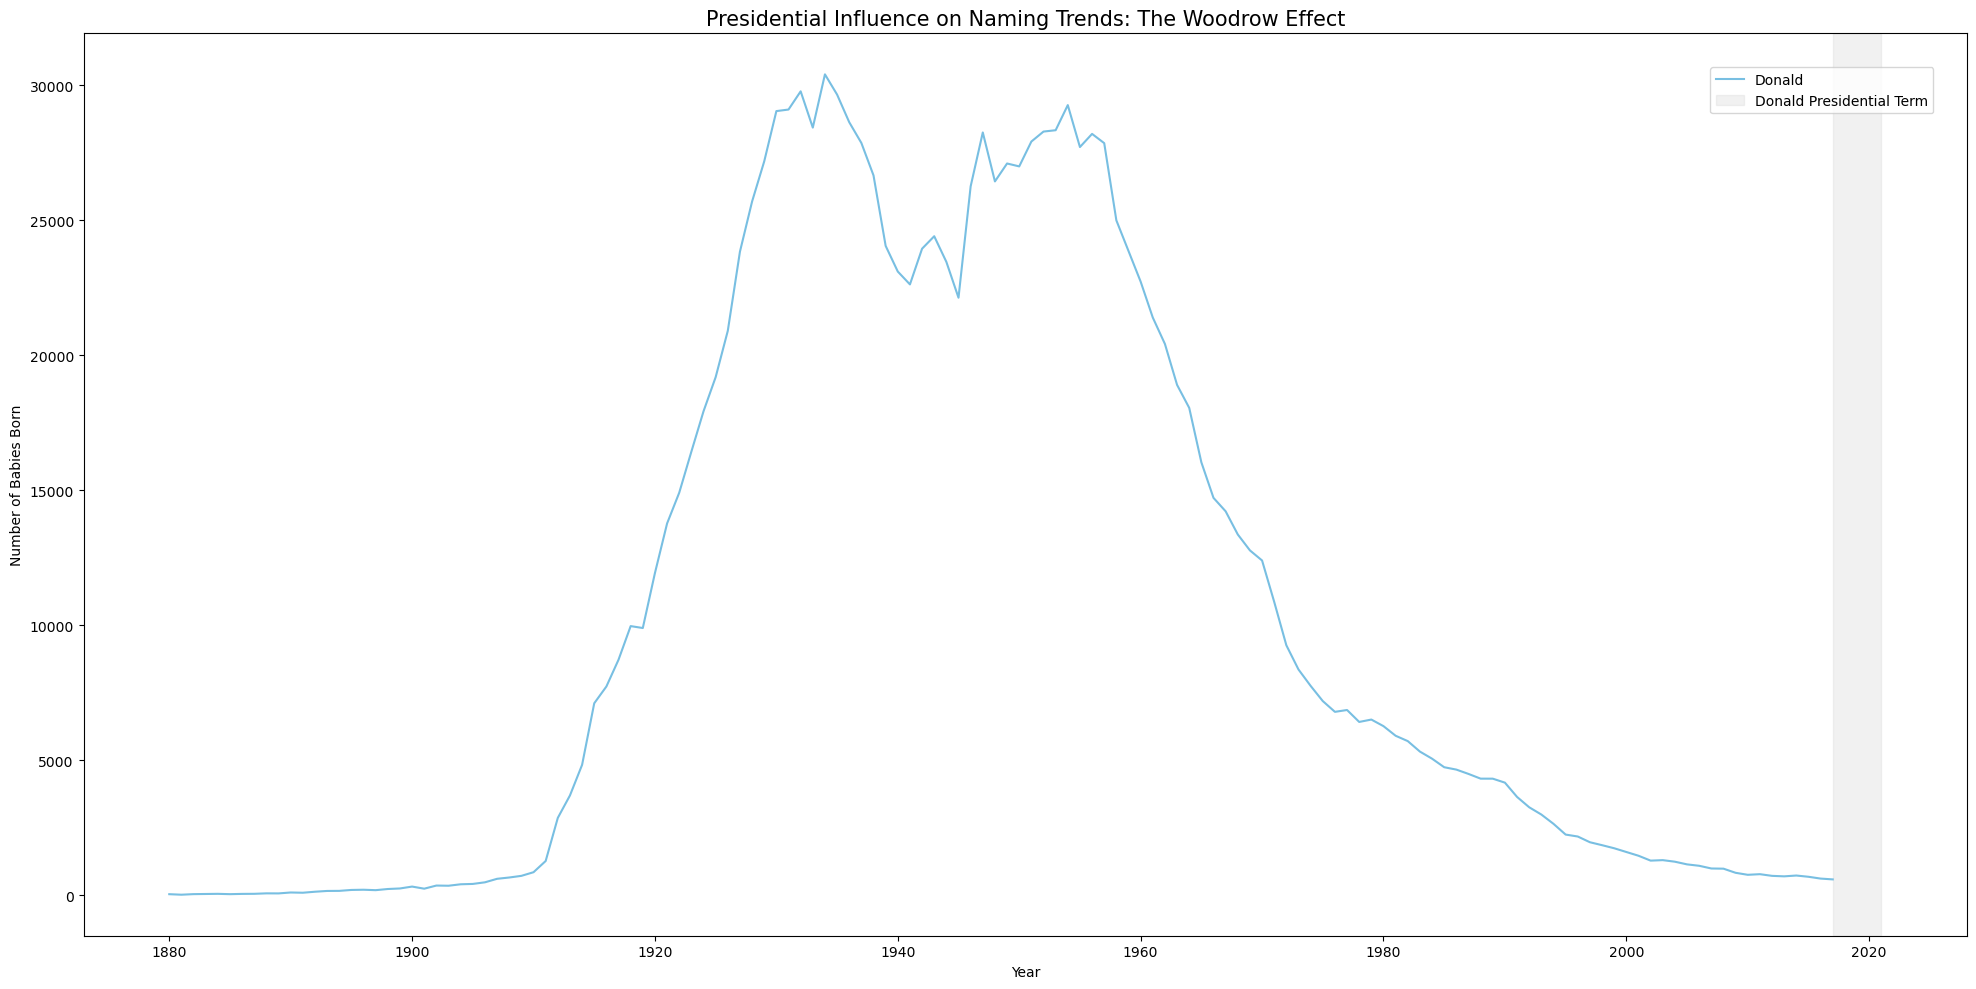

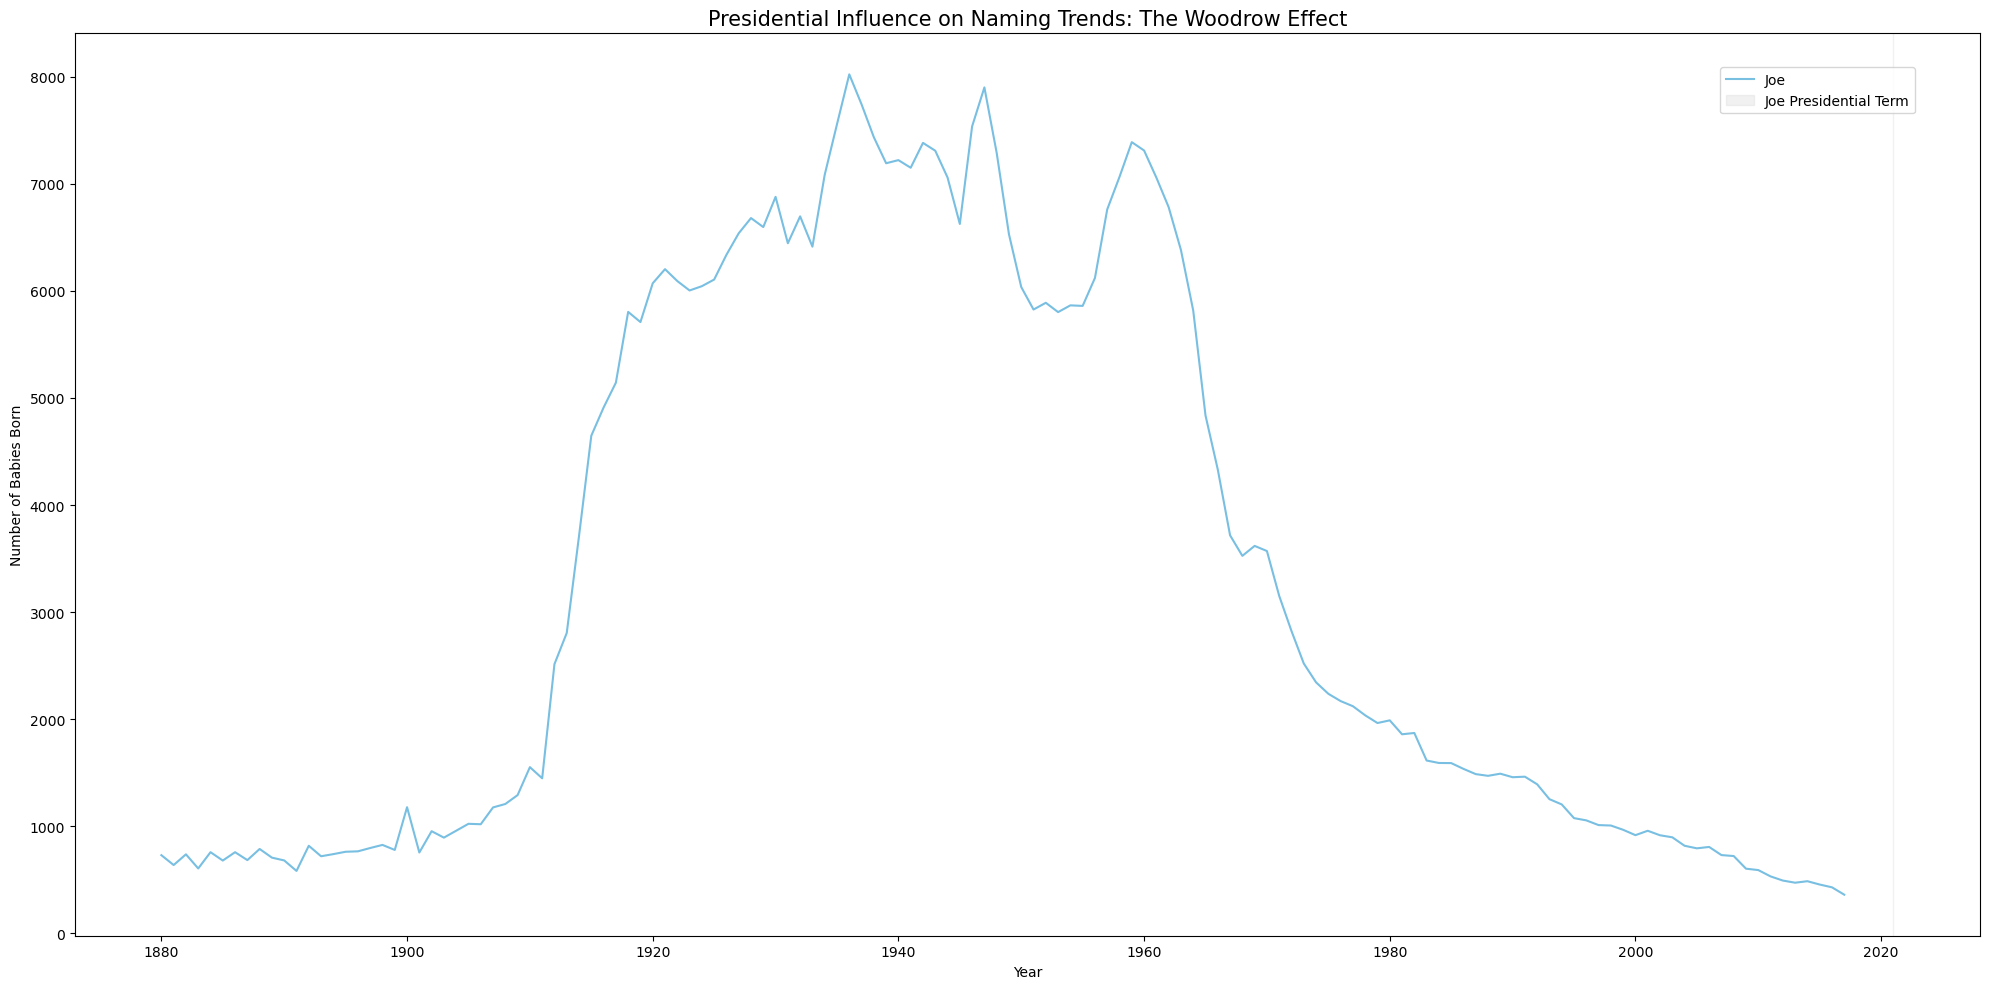

In [595]:
unique_names = president_baby['name'].unique()

# Define the terms of presidents if not defined
# terms = [{'first_name': 'Name', 'start': start_year, 'end': end_year}, ...]

# Iterate through unique names and create line charts
for name in unique_names:
    # Filter the DataFrame for the current name
    filtered_df = president_baby[president_baby['name'] == name]

    # Create a line chart for the current name
    plt.figure(figsize=(20, 10))
    plt.plot(filtered_df['year'], filtered_df['count'], label=name, color='#78bfe2')  # Set the line color to #78bfe2

    # Highlight the regions based on 'terms'
    for term in terms:
        if term['first_name'] == name:
            start_year = term['start']
            end_year = term['end']

            # Shade the region between 'start' and 'end' years
            plt.axvspan(start_year, end_year, alpha=0.3, color='#D3D3D3', label=f'{name} Presidential Term')

    # Customize chart labels and title
    plt.xlabel('Year', fontsize = 10)
    plt.ylabel('Number of Babies Born', fontsize = 10)
    plt.title(f'Presidential Influence on Naming Trends: The Woodrow Effect', fontsize = 15)

    # Place the legend outside the graph to the right
    plt.legend(loc='upper left', bbox_to_anchor=(0.86, 0.97))

    # Adjust the layout to prevent the label and legend from being cut off
    plt.tight_layout()

    # Show the plot for the current name
    plt.show()

# Life Expectancy

In [371]:
lf_male = pd.read_csv('Life Expectancy - Male.csv')
lf_female = pd.read_csv('Life Expectancy - Female.csv')
lf_female = lf_female[['year', 'life expectancy']]

In [372]:
names1 = names.copy()
names1 = names1.rename(columns = {'year':'birth_year'})
names1 = names1[names1['birth_year'] >= 1900]

In [373]:
names1_male = names1[names1['sex'] == 'M']
names1_male = pd.merge(names1_male, lf_male, left_on = 'birth_year', right_on = 'year', how = 'inner')
names1_male = names1_male.drop(columns = ['year'])
names1_male['exp_death_year'] = names1_male['birth_year'] + names1_male['life expectancy']
names1_male 

,birth_year,sex,name,count,prob,decade,life expectancy,exp_death_year
0,1900,M,John,9829,0.060623,1900,46.0,1946.0
1,1900,M,William,8579,0.052913,1900,46.0,1946.0
2,1900,M,James,7245,0.044686,1900,46.0,1946.0
3,1900,M,George,5403,0.033324,1900,46.0,1946.0
4,1900,M,Charles,4099,0.025282,1900,46.0,1946.0
...,...,...,...,...,...,...,...,...
763305,2017,M,Zykai,5,0.000003,2010,76.0,2093.0
763306,2017,M,Zykeem,5,0.000003,2010,76.0,2093.0
763307,2017,M,Zylin,5,0.000003,2010,76.0,2093.0
763308,2017,M,Zylis,5,0.000003,2010,76.0,2093.0


In [374]:
names1_female = names1[names1['sex'] == 'F']
names1_female = pd.merge(names1_female, lf_female, left_on = 'birth_year', right_on = 'year', how = 'inner')
names1_female = names1_female.drop(columns = ['year'])
names1_female['exp_death_year'] = names1_female['birth_year'] + names1_female['life expectancy']
names1_female

,birth_year,sex,name,count,prob,decade,life expectancy,exp_death_year
0,1900,F,Mary,16706,0.052576,1900,48.0,1948.0
1,1900,F,Helen,6343,0.019962,1900,48.0,1948.0
2,1900,F,Anna,6114,0.019241,1900,48.0,1948.0
3,1900,F,Margaret,5304,0.016692,1900,48.0,1948.0
4,1900,F,Ruth,4765,0.014996,1900,48.0,1948.0
...,...,...,...,...,...,...,...,...
1109085,2017,F,Zyianna,5,0.000003,2010,81.0,2098.0
1109086,2017,F,Zykira,5,0.000003,2010,81.0,2098.0
1109087,2017,F,Zymia,5,0.000003,2010,81.0,2098.0
1109088,2017,F,Zynia,5,0.000003,2010,81.0,2098.0


In [315]:
names1_male.sort_values(by = 'alive_count_2017', ascending = False)

,birth_year,sex,name,count,prob,decade,life expectancy,exp_death_year,alive_count_2017
212227,1957,M,Michael,92695,0.042376,1950,66.0,2023.0,92695
207777,1956,M,Michael,90620,0.042255,1950,67.0,2023.0,90620
216779,1958,M,Michael,90520,0.042043,1950,67.0,2025.0,90520
199037,1954,M,Michael,88514,0.042793,1950,67.0,2021.0,88514
203389,1955,M,Michael,88335,0.042274,1950,67.0,2022.0,88335
...,...,...,...,...,...,...,...,...,...
124128,1935,M,Blanchard,8,0.000007,1930,60.0,1995.0,0
124127,1935,M,Blain,8,0.000007,1930,60.0,1995.0,0
124126,1935,M,Benigno,8,0.000007,1930,60.0,1995.0,0
124125,1935,M,Benedetto,8,0.000007,1930,60.0,1995.0,0


In [375]:
names1_male[names1_male['name'] == 'John']

,birth_year,sex,name,count,prob,decade,life expectancy,exp_death_year
0,1900,M,John,9829,0.060623,1900,46.0,1946.0
1506,1901,M,John,6900,0.059691,1900,48.0,1949.0
2716,1902,M,John,7907,0.059563,1900,50.0,1952.0
4036,1903,M,John,7608,0.058828,1900,49.0,1952.0
5342,1904,M,John,8108,0.058538,1900,46.0,1950.0
...,...,...,...,...,...,...,...,...
692905,2013,M,John,10704,0.005308,2010,76.0,2089.0
706942,2014,M,John,10687,0.005228,2010,77.0,2091.0
720989,2015,M,John,10373,0.005089,2010,76.0,2091.0
735015,2016,M,John,9995,0.004953,2010,76.0,2092.0


In [326]:
names1_male['exp_death_year'] = names1_male['exp_death_year'].astype(int)

In [332]:
names1_male2

,birth_year,sex,name,count,prob,decade,life expectancy,exp_death_year


In [376]:
names1_male2 = names1_male[(names1_male['name'] == 'John') | (names1_male['name'] == 'William')]
alive_counts_df = pd.DataFrame()

# Get a list of unique names in the DataFrame
unique_names = names1_male2['name'].unique()

# Process each name separately
for name in unique_names:
    # Filter the DataFrame for the current name
    name_df = names1_male2[names1_male2['name'] == name].copy()
    
    # Sort the DataFrame by birth_year to ensure correct sequential processing
    name_df.sort_values(by='birth_year', inplace=True)
    
    # Dictionary to hold the count of alive people by year for the current name
    alive_counts = {}
    
    # Iterate over each row in the name DataFrame
    for _, row in name_df.iterrows():
        birth_year = int(row['birth_year'])
        exp_death_year = int(row['exp_death_year'])
        count = row['count']
        
        # Add the count to all subsequent years up to the expected death year
        for year in range(birth_year, exp_death_year):
            alive_counts[year] = alive_counts.get(year, 0) + count
        
        # Subtract the count from the expected death year onwards
        for year in range(exp_death_year, exp_death_year + 1):
            alive_counts[year] = alive_counts.get(year, 0) - count
    
    # Convert the alive counts to a DataFrame
    name_alive_df = pd.DataFrame(list(alive_counts.items()), columns=['year', 'alive_count'])
    name_alive_df['name'] = name  # Add a column for the name
    
    # Append to the main DataFrame
    alive_counts_df = pd.concat([alive_counts_df, name_alive_df])

# Group by year and name to remove negative counts and sum up counts per name per year
alive_counts_df = alive_counts_df.groupby(['year', 'name'], as_index=False).agg({'alive_count': 'sum'})

# Ensure alive_count does not go below zero
alive_counts_df['alive_count'] = alive_counts_df['alive_count'].clip(lower=0)

# Display the resulting DataFrame
print(alive_counts_df.head())

   year     name  alive_count
0  1900     John         9829
1  1900  William         8579
2  1901     John        16729
3  1901  William        14569
4  1902     John        24636


In [329]:
names1_male.head(20)

,birth_year,sex,name,count,prob,decade,life expectancy,exp_death_year
0,1900,M,John,9829,0.060623,1900,46.0,1946
1,1900,M,William,8579,0.052913,1900,46.0,1946
2,1900,M,James,7245,0.044686,1900,46.0,1946
3,1900,M,George,5403,0.033324,1900,46.0,1946
4,1900,M,Charles,4099,0.025282,1900,46.0,1946
5,1900,M,Robert,3821,0.023567,1900,46.0,1946
6,1900,M,Joseph,3714,0.022907,1900,46.0,1946
7,1900,M,Frank,3477,0.021445,1900,46.0,1946
8,1900,M,Edward,2720,0.016776,1900,46.0,1946
9,1900,M,Henry,2606,0.016073,1900,46.0,1946


In [377]:
alive_counts_df

,year,name,alive_count
0,1900,John,9829
1,1900,William,8579
2,1901,John,16729
3,1901,William,14569
4,1902,John,24636
...,...,...,...
383,2091,William,0
384,2092,John,0
385,2092,William,0
386,2093,John,0


In [378]:
names1_male['alive_count_2017'] = np.where(names1_male['exp_death_year'] >= 2017, names1_male['count'], 0)
names1_female['alive_count_2017'] = np.where(names1_female['exp_death_year'] >= 2017, names1_female['count'], 0)

In [379]:
names1_male

,birth_year,sex,name,count,prob,decade,life expectancy,exp_death_year,alive_count_2017
0,1900,M,John,9829,0.060623,1900,46.0,1946.0,0
1,1900,M,William,8579,0.052913,1900,46.0,1946.0,0
2,1900,M,James,7245,0.044686,1900,46.0,1946.0,0
3,1900,M,George,5403,0.033324,1900,46.0,1946.0,0
4,1900,M,Charles,4099,0.025282,1900,46.0,1946.0,0
...,...,...,...,...,...,...,...,...,...
763305,2017,M,Zykai,5,0.000003,2010,76.0,2093.0,5
763306,2017,M,Zykeem,5,0.000003,2010,76.0,2093.0,5
763307,2017,M,Zylin,5,0.000003,2010,76.0,2093.0,5
763308,2017,M,Zylis,5,0.000003,2010,76.0,2093.0,5


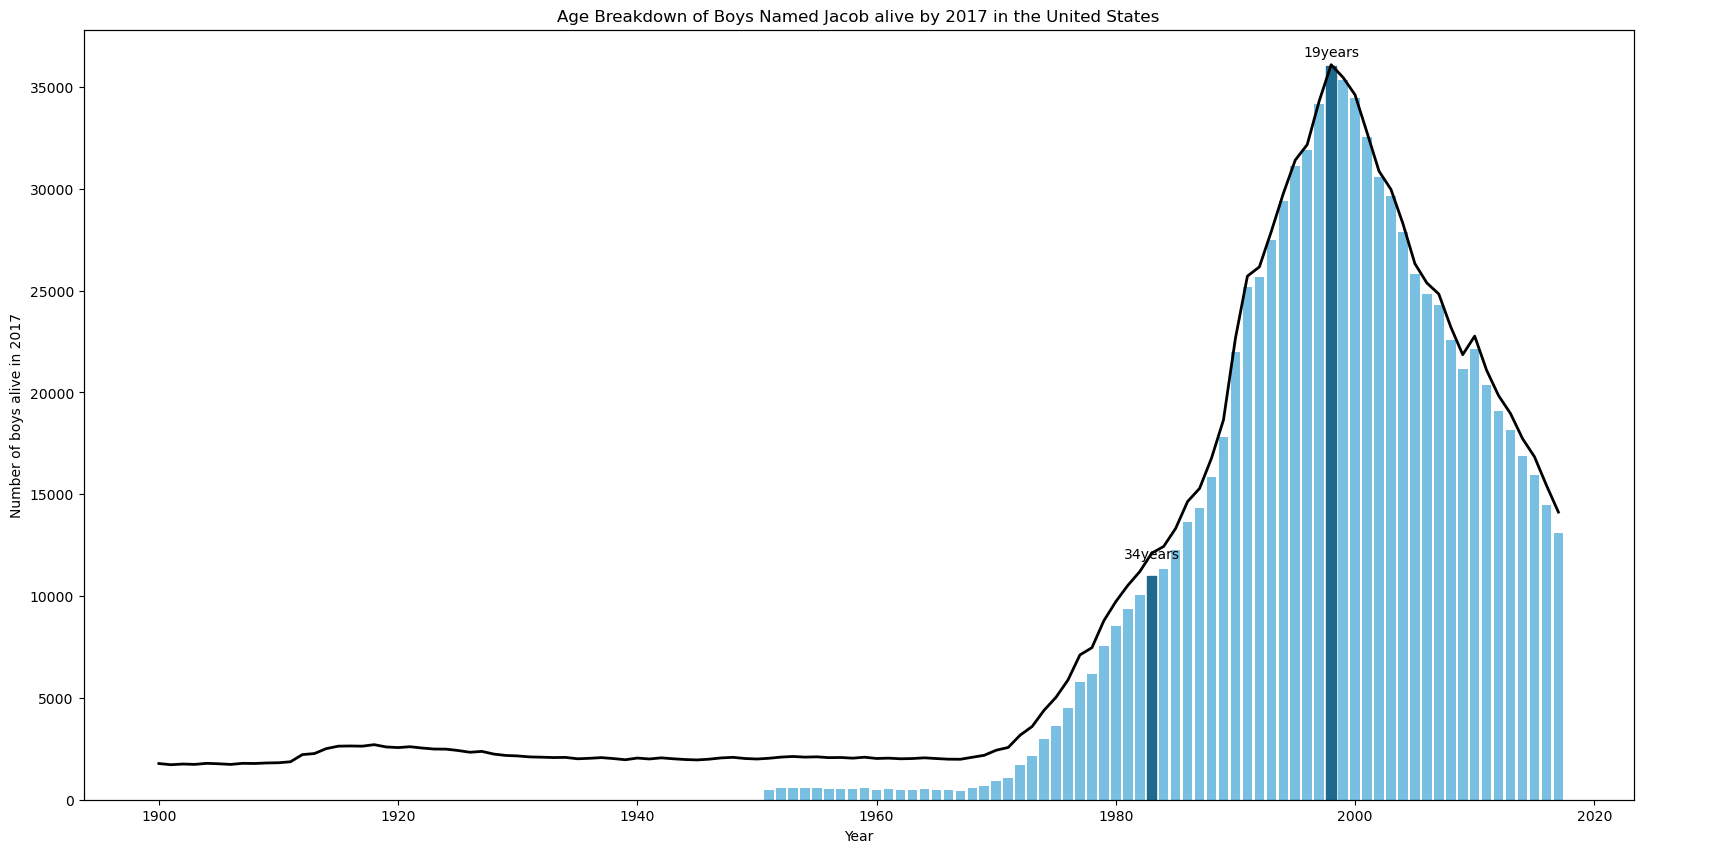

In [555]:
given_name = 'Jacob'
names1_male1 = names1_male[names1_male['name'] == given_name]

fig, ax1 = plt.subplots(figsize=(20, 10))

# Find the maximum alive_count_2017 value
max_count_value = names1_male1['alive_count_2017'].max()

# Plot the bars and highlight the bar with the maximum value
bars = ax1.bar(names1_male1['birth_year'], names1_male1['alive_count_2017'], color='#78bfe2', label='Alive Count 2017')

for bar, value, year in zip(bars, names1_male1['alive_count_2017'], names1_male1['birth_year']):
    if value == max_count_value:
        bar.set_color('#1f698e')  # Highlight max value bar
        age_in_2017 = 2017 - year
        ax1.text(bar.get_x() + bar.get_width() / 2, value+ max_count_value * 0.01, str(age_in_2017) + 'years', 
                 ha='center', va='bottom', color='black', fontsize=10)
        
    if year == 1983:
        bar.set_color('#1f698e')  # Highlight max value bar
        age_in_2017 = 2017 - year
        ax1.text(bar.get_x() + bar.get_width() / 2, value+ max_count_value * 0.02, str(age_in_2017) + 'years', 
                 ha='center', va='bottom', color='black', fontsize=10)

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of boys alive in 2017', color='black')
ax1.tick_params('y', colors='black')

# Create another axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(names1_male1['birth_year'], names1_male1['count'], color='black', label='Count', linewidth = 2)
ax2.set_ylabel('Count', color='white')
ax2.tick_params('y', colors='white')
#ax1.set_ylim(0, max_value)
#ax2.set_ylim(0, max_value)

# Optionally, you can add a title
plt.title('Age Breakdown of Boys Named '+ given_name + ' alive by 2017 in the United States')

# Show the plot
plt.show()

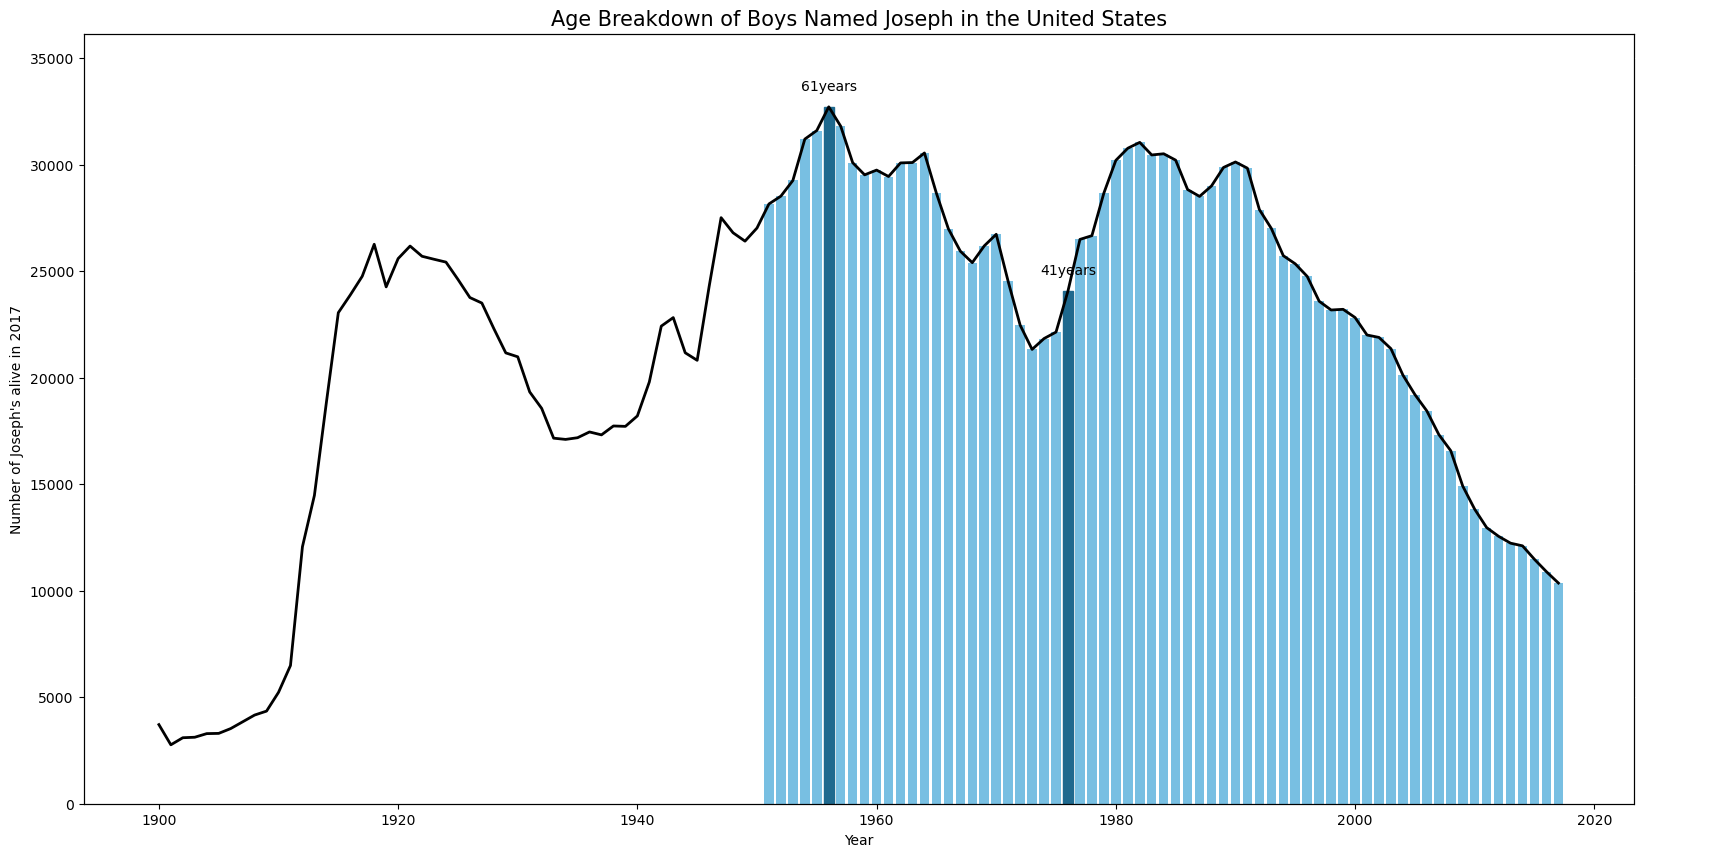

In [571]:
given_name = 'Joseph'
names1_male1 = names1_male[names1_male['name'] == given_name]

fig, ax1 = plt.subplots(figsize=(20, 10))

# Find the maximum alive_count_2017 value
max_count_value = names1_male1['alive_count_2017'].max()

# Plot the bars and highlight the bar with the maximum value
bars = ax1.bar(names1_male1['birth_year'], names1_male1['alive_count_2017'], color='#78bfe2', label='Alive Count 2017')

for bar, value, year in zip(bars, names1_male1['alive_count_2017'], names1_male1['birth_year']):
    if (value == max_count_value) | (year == 1976):
        bar.set_color('#1f698e')  
        age_in_2017 = 2017 - year
        ax1.text(bar.get_x() + bar.get_width() / 2, value+ max_count_value * 0.02, str(age_in_2017) + 'years', 
                 ha='center', va='bottom', color='black', fontsize=10)

ax1.set_xlabel('Year', fontsize = 10)
ax1.set_ylabel("Number of Joseph's alive in 2017", color='black', fontsize = 10)
ax1.tick_params('y', colors='black')

# Create another axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(names1_male1['birth_year'], names1_male1['count'], color='black', label='Count', linewidth = 2)
ax2.set_ylabel('Count', color='white')
ax2.tick_params('y', colors='white')
ax1.set_ylim(0, max_value)
ax2.set_ylim(0, max_value)
# Optionally, you can add a title
plt.title('Age Breakdown of Boys Named '+ given_name + ' in the United States', fontsize = 15)

# Show the plot
plt.show()

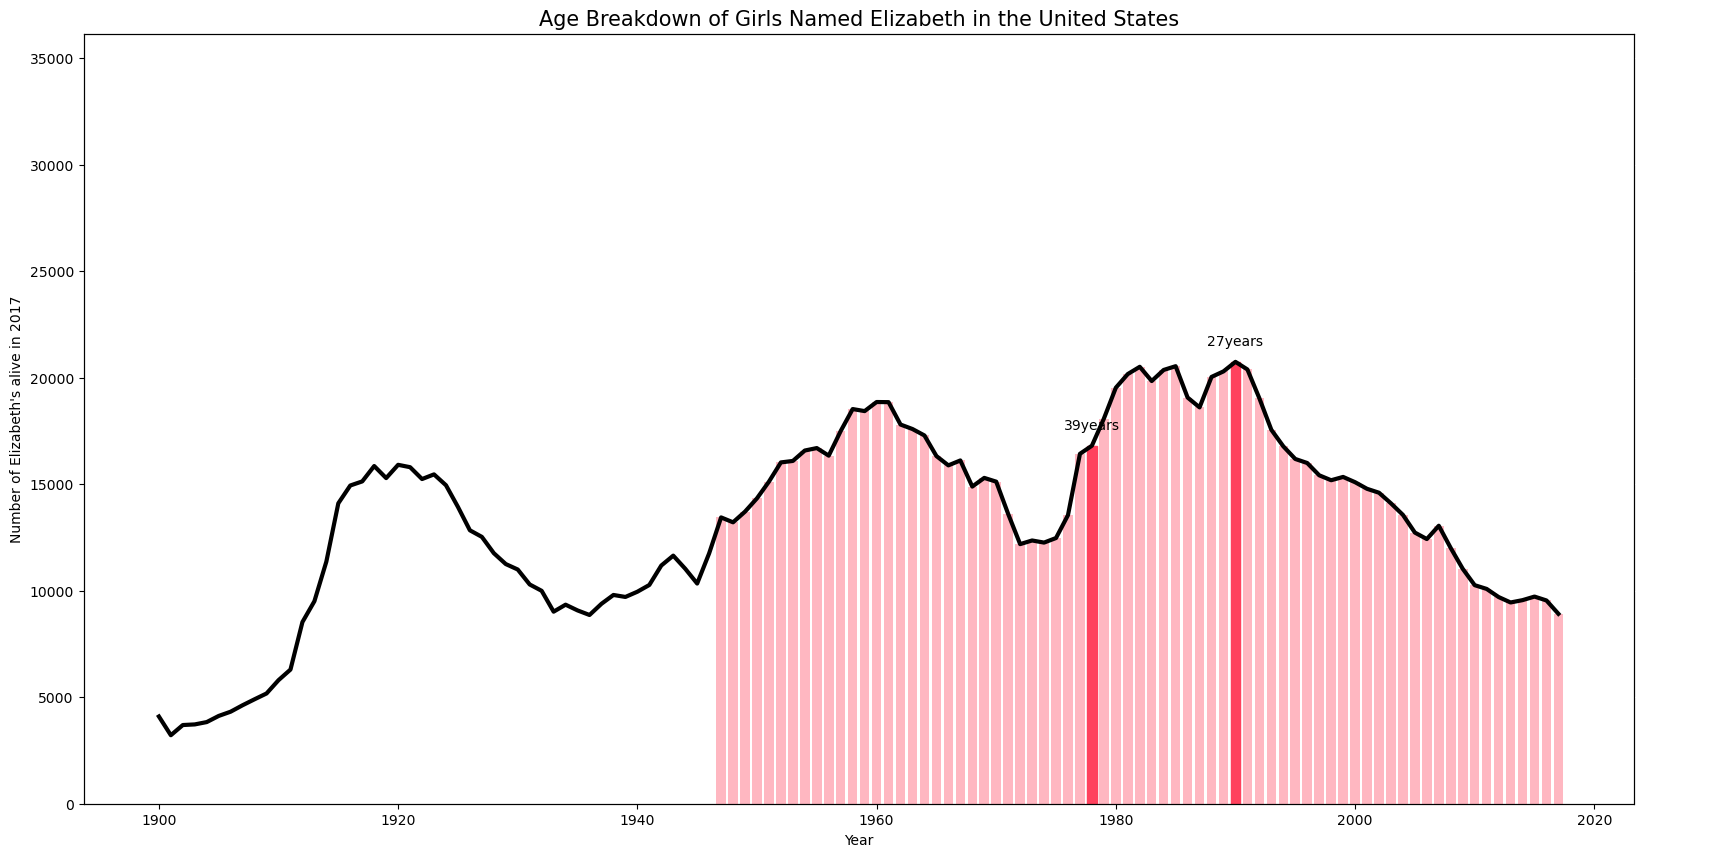

In [576]:
given_name = 'Elizabeth'
names1_female1 = names1_female[names1_female['name'] == given_name]

fig, ax1 = plt.subplots(figsize=(20, 10))

# Find the maximum alive_count_2017 value
max_count_value = names1_female1['alive_count_2017'].max()

# Plot the bars and highlight the bar with the maximum value
bars = ax1.bar(names1_female1['birth_year'], names1_female1['alive_count_2017'], color='#ffb7c1', label='Alive Count 2017')

# Loop through the bars and change the color of the bar with the max value
for bar, value, year in zip(bars, names1_female1['alive_count_2017'], names1_female1['birth_year']):
    if (value == max_count_value) | (year == 1978):
        bar.set_color('#ff415d')  # Highlight max value bar
        age_in_2017 = 2017 - year
        ax1.text(bar.get_x() + bar.get_width() / 2, value+ max_count_value * 0.03, str(age_in_2017) + 'years', 
                 ha='center', va='bottom', color='black', fontsize=10)

ax1.set_xlabel('Year',  fontsize = 10)
ax1.set_ylabel("Number of Elizabeth's alive in 2017", color='black', fontsize = 10)
ax1.tick_params('y', colors='black')

# Create another axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(names1_female1['birth_year'], names1_female1['count'], color='black', label='Count', linewidth = 3)
ax2.set_ylabel('Count', color='white')
ax2.tick_params('y', colors='white')
ax1.set_ylim(0, max_value)
ax2.set_ylim(0, max_value)

# Optionally, you can add a title
plt.title('Age Breakdown of Girls Named '+ given_name + ' in the United States', fontsize = 15)

# Show the plot
plt.show()

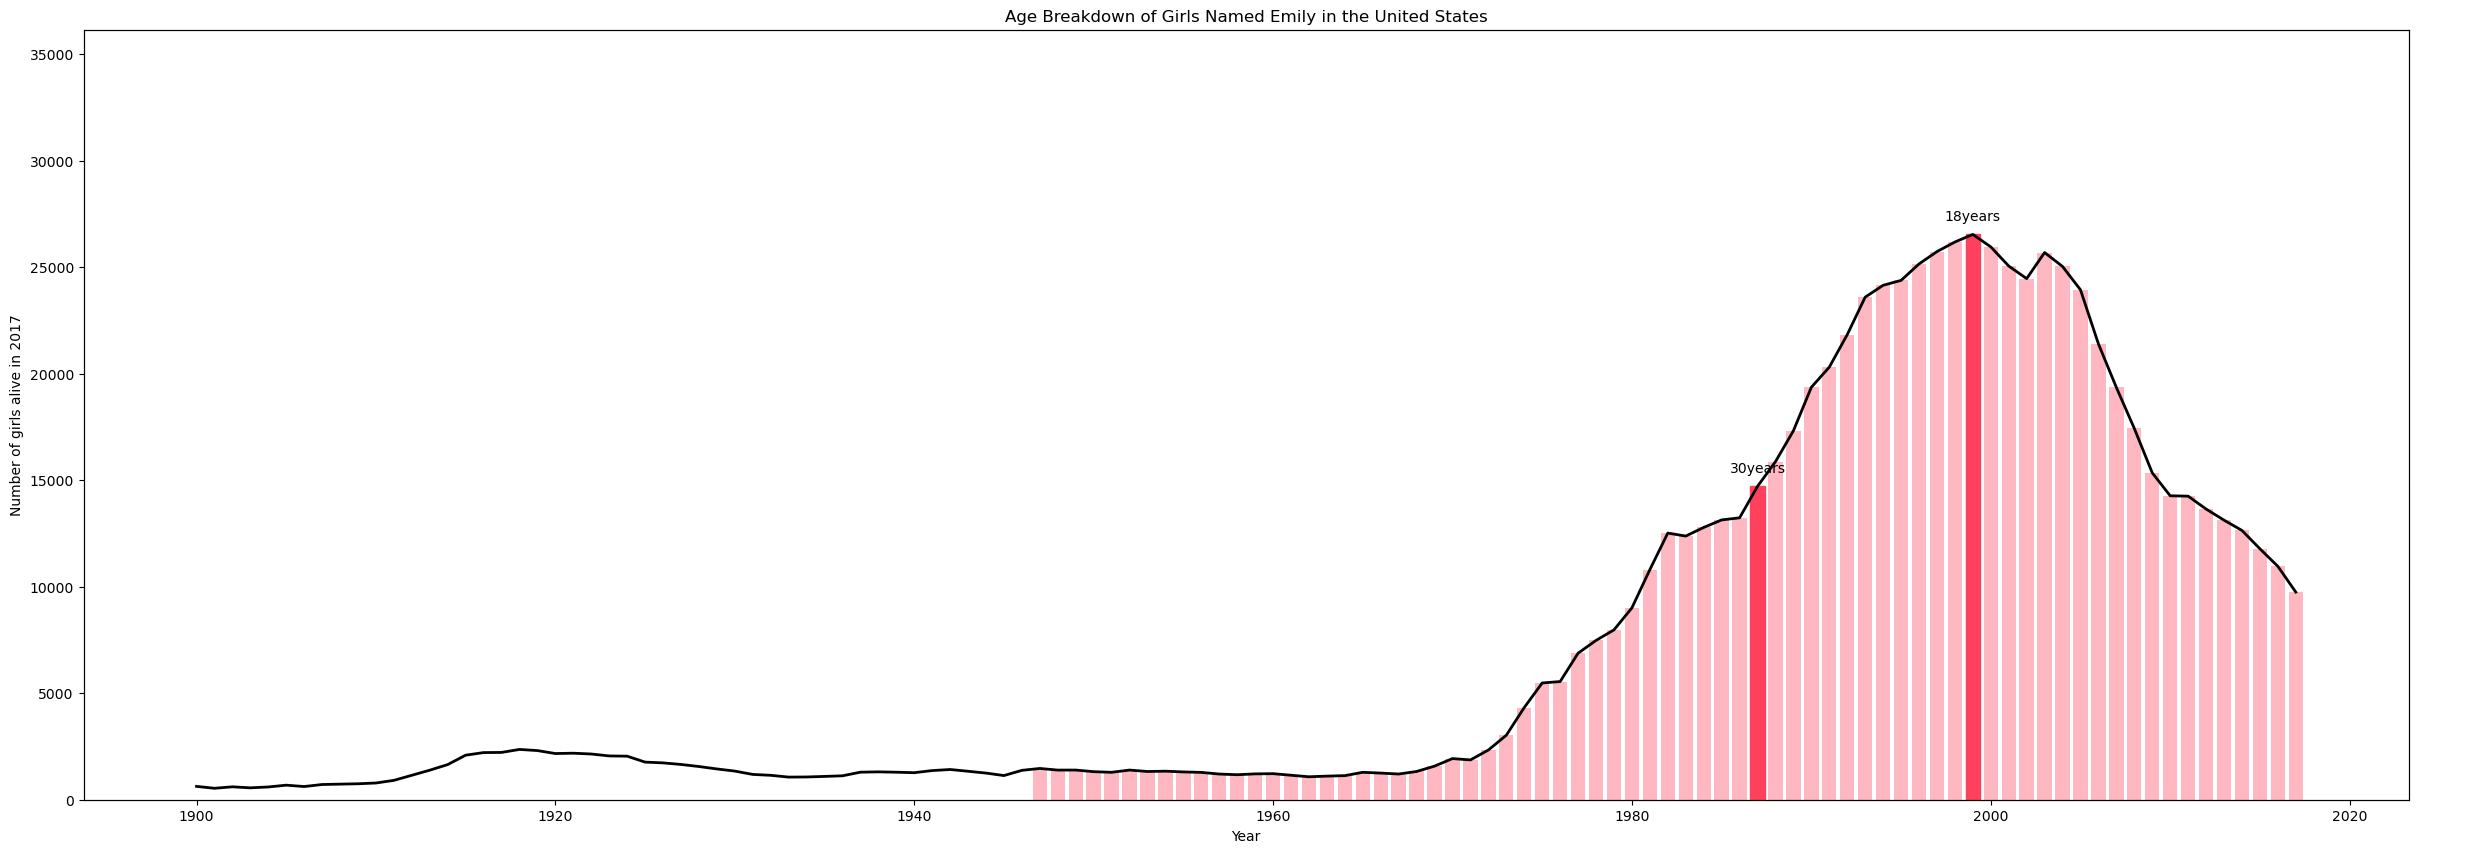

In [544]:
given_name = 'Emily'
names1_female1 = names1_female[names1_female['name'] == given_name]
fig, ax1 = plt.subplots(figsize=(30, 10))

# Find the maximum alive_count_2017 value
max_count_value = names1_female1['alive_count_2017'].max()

# Plot the bars and highlight the bar with the maximum value
bars = ax1.bar(names1_female1['birth_year'], names1_female1['alive_count_2017'], color='#ffb7c1', label='Alive Count 2017')

# Loop through the bars and change the color of the bar with the max value
for bar, value, year in zip(bars, names1_female1['alive_count_2017'], names1_female1['birth_year']):
    if (value == max_count_value) | (year == 1987):
        bar.set_color('#ff415d')  # Highlight max value bar
        age_in_2017 = 2017 - year
        ax1.text(bar.get_x() + bar.get_width() / 2, value+ max_count_value * 0.02, str(age_in_2017) + 'years', 
                 ha='center', va='bottom', color='black', fontsize=10)

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of girls alive in 2017', color='black')
ax1.tick_params('y', colors='black')

# Create another axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(names1_female1['birth_year'], names1_female1['count'], color='black', label='Count', linewidth = 2)
ax2.set_ylabel('Count', color='white')
ax2.tick_params('y', colors='white')
ax1.set_ylim(0, max_value)
ax2.set_ylim(0, max_value)

# Optionally, you can add a title
plt.title('Age Breakdown of Girls Named '+ given_name + ' in the United States')

# Show the plot
plt.show()

# Younger and Older Names

In [401]:
names2 = pd.concat([names1_male, names1_female])
names2 = names2[names2['exp_death_year'] >= 2017]
names2

,birth_year,sex,name,count,prob,decade,life expectancy,exp_death_year,alive_count_2017
186190,1951,M,James,87272,0.045648,1950,66.0,2017.0,87272
186191,1951,M,Robert,86361,0.045172,1950,66.0,2017.0,86361
186192,1951,M,John,81577,0.042670,1950,66.0,2017.0,81577
186193,1951,M,Michael,72799,0.038078,1950,66.0,2017.0,72799
186194,1951,M,David,64801,0.033895,1950,66.0,2017.0,64801
...,...,...,...,...,...,...,...,...,...
1109085,2017,F,Zyianna,5,0.000003,2010,81.0,2098.0,5
1109086,2017,F,Zykira,5,0.000003,2010,81.0,2098.0,5
1109087,2017,F,Zymia,5,0.000003,2010,81.0,2098.0,5
1109088,2017,F,Zynia,5,0.000003,2010,81.0,2098.0,5


In [403]:
names2['age_in_2017'] = 2017 - names2['birth_year']

# Calculate the median age for each name
median_ages = names2.groupby('name')['age_in_2017'].median().reset_index()

# Rename the column to 'median_age'
median_ages.rename(columns={'age_in_2017': 'median_age'}, inplace=True)
median_ages = median_ages.sort_values(by = 'median_age', ascending = False)
median_ages

,name,median_age
87794,Wyonne,70.0
43885,Kathay,70.0
51362,Leaetta,70.0
71055,Roselea,70.0
49276,Ladeane,70.0
...,...,...
79702,Tahli,0.0
89025,Yishan,0.0
32714,Huxtyn,0.0
51338,Lazayah,0.0


In [452]:
median_ages[(median_ages['name'] == 'Jacob') | (median_ages['name'] == 'Joseph') | (median_ages['name'] == 'Anna') | (median_ages['name'] == 'Emily')]

,name,median_age
5945,Anna,34.5
40868,Joseph,34.0
26348,Emily,29.5
34419,Jacob,28.5


In [461]:
median_ages[(median_ages['name'] == 'Mason')]

,name,median_age
57608,Mason,26.0


In [500]:
median_ages[(median_ages['name'] == 'Joseph')]

,name,median_age
40868,Joseph,34.0


In [501]:
median_ages[(median_ages['name'] == 'John')]

,name,median_age
40161,John,34.0


In [438]:
names2[names2['name'] == 'Deylan']

,birth_year,sex,name,count,prob,decade,life expectancy,exp_death_year,alive_count_2017,age_in_2017
512726,1999,M,Deylan,7,0.000003,1990,74.0,2073.0,7,18
551784,2002,M,Deylan,5,0.000002,2000,74.0,2076.0,5,15
631041,2008,M,Deylan,7,0.000003,2000,76.0,2084.0,7,9
643361,2009,M,Deylan,10,0.000005,2000,76.0,2085.0,10,8
659973,2010,M,Deylan,7,0.000003,2010,76.0,2086.0,7,7
691362,2012,M,Deylan,5,0.000002,2010,76.0,2088.0,5,5
702775,2013,M,Deylan,7,0.000003,2010,76.0,2089.0,7,4
716794,2014,M,Deylan,7,0.000003,2010,77.0,2091.0,7,3
729895,2015,M,Deylan,8,0.000004,2010,76.0,2091.0,8,2
744886,2016,M,Deylan,7,0.000003,2010,76.0,2092.0,7,1
